# I. Importing libraries
##### In this phase, essential libraries are imported to the project. Libraries provide pre-built functionalities that help streamline the development process.

In [54]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import confusion_matrix
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# II. Dataset download
##### This step involves acquiring the dataset required for analysis. Whether it's from a web source, database, or local file, downloading the dataset is crucial for subsequent stages.

In [55]:
data = pd.read_csv('marketing-data/ifood_df.csv')
data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [56]:
# Dataset shape
data.shape


(2205, 39)

In [57]:
# Meta data
data.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [58]:
# Columns
data.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [59]:
# data types in the dataset
data.dtypes


Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

# III. Exploratory Data Analysis (EDA)
##### EDA is a preliminary data analysis phase where key statistical and visual techniques are employed to understand the dataset's characteristics, identify patterns, and gain initial insights.

### III.1) Marketing Campaing Analysis

In [60]:
# Selecting only marketing campaing features
campaing_data = data[['AcceptedCmp1',
                 'AcceptedCmp2',
                 'AcceptedCmp3',
                 'AcceptedCmp4',
                 'AcceptedCmp5',
                 'Response',
                 'Complain',
                 'AcceptedCmpOverall']]

campaing_data


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,AcceptedCmpOverall
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2200,0,0,0,0,0,0,0,0
2201,1,0,0,0,0,0,0,1
2202,0,0,0,1,0,0,0,1
2203,0,0,0,0,0,0,0,0


In [61]:
# Creating classes with the campaing data

# Filter for customers who accepted more than one campaign
more_than_one = campaing_data[campaing_data['AcceptedCmpOverall'] > 1]

# Filter for customers who complained but did not accept any campaign
complain_without_accept = campaing_data[(campaing_data['AcceptedCmpOverall'] == 0) & (campaing_data['Complain'] > 0)]

# Filter for customers who accepted at least once and complained
accepted_once_and_complained = campaing_data[(campaing_data['AcceptedCmpOverall'] == 1) & (campaing_data['Complain'] > 0)]

# Filter for customers who accepted more than once and complained
accepted_more_and_complained = campaing_data[(campaing_data['AcceptedCmpOverall'] > 1) & (campaing_data['Complain'] > 0)]

# Filter for customers who complained
complained = campaing_data[(campaing_data['Complain'] > 0)]

# Filter for customers who accepted at least once
accepted = campaing_data[campaing_data['AcceptedCmpOverall'] > 0]

# Filter for customers who accepted the first campaign
first_adopters = campaing_data[campaing_data['AcceptedCmp1'] == 1]

# Filter for customers who accepted the second campaign
seccmp_adopters = campaing_data[campaing_data['AcceptedCmp2'] == 1]

# Filter for customers who accepted the third campaign
thirdcmp_adopters = campaing_data[campaing_data['AcceptedCmp3'] == 1]

# Filter for customers who accepted the fourth campaign
fourthcmp_adopters = campaing_data[campaing_data['AcceptedCmp4'] == 1]

# Filter for customers who accepted the fifth campaign
fithcmp_adopters = campaing_data[campaing_data['AcceptedCmp5'] == 1]

# Filter for customers who responded positively to the last campaign
last_campaing = campaing_data[campaing_data['Response'] == 1]

# Calculate conversion rates for each campaign and overall
conversion_last = round((last_campaing.shape[0] / campaing_data.shape[0]) * 100)
conversion_1st_cmp = round((first_adopters.shape[0] / campaing_data.shape[0]) * 100)
conversion_2nd_cmp = round((seccmp_adopters.shape[0] / campaing_data.shape[0]) * 100)
conversion_3rd_cmp = round((thirdcmp_adopters.shape[0] / campaing_data.shape[0]) * 100)
conversion_4th_cmp = round((fourthcmp_adopters.shape[0] / campaing_data.shape[0]) * 100)
conversion_5th_cmp = round((fithcmp_adopters.shape[0] / campaing_data.shape[0]) * 100)

# Display a summary of conversion rates, customer counts, and complaint statistics for marketing campaigns.
print(f'For this company, there was a conversion of {conversion_last}% in the last campaing and the following conversions in the first 5 campaigns {conversion_1st_cmp}%,{conversion_2nd_cmp}%,{conversion_3rd_cmp}%,{conversion_4th_cmp} and {conversion_5th_cmp}%, consecutively.\n'
      f'{first_adopters.shape[0]} converted in the first campaign and {last_campaing.shape[0]} converted in the last.\n'
      f'Having a total of {complained.shape[0]} complaints, {complain_without_accept.shape[0]} of which there was no acceptance of the campaign, '
      f'{accepted_once_and_complained.shape[0]} accepted once and {accepted_more_and_complained.shape[0]} accepted more than once.'
)


For this company, there was a conversion of 15% in the last campaing and the following conversions in the first 5 campaigns 6%,1%,7%,7 and 7%, consecutively.
142 converted in the first campaign and 333 converted in the last.
Having a total of 20 complaints, 18 of which there was no acceptance of the campaign, 1 accepted once and 1 accepted more than once.


### III.2) Education Analysis

In [62]:
# Selecting only education level features
education_data = data[['education_2n Cycle',
                 'education_Basic',
                 'education_Graduation',
                 'education_Master',
                 'education_PhD'
                 ]]

#Identifying whether only one education is possible (maximum sum = 1)
education_data['overall_education'] = data['education_2n Cycle'] + data['education_Basic'] + data['education_Graduation'] + data['education_Master'] + data['education_PhD']
education_data.describe()


/tmp/ipykernel_1965/639398981.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_data['overall_education'] = data['education_2n Cycle'] + data['education_Basic'] + data['education_Graduation'] + data['education_Master'] + data['education_PhD']


,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,overall_education
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0
mean,0.089796,0.024490,0.504762,0.165079,0.215873,1.0
std,0.285954,0.154599,0.500091,0.371336,0.411520,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [63]:
# Creating a single categorical column to designate education
education_data['education_level'] = education_data.idxmax(axis=1)
education_data


/tmp/ipykernel_1965/2522214075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_data['education_level'] = education_data.idxmax(axis=1)


,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,overall_education,education_level
0,0,0,1,0,0,1,education_Graduation
1,0,0,1,0,0,1,education_Graduation
2,0,0,1,0,0,1,education_Graduation
3,0,0,1,0,0,1,education_Graduation
4,0,0,0,0,1,1,education_PhD
...,...,...,...,...,...,...,...
2200,0,0,1,0,0,1,education_Graduation
2201,0,0,0,0,1,1,education_PhD
2202,0,0,1,0,0,1,education_Graduation
2203,0,0,0,1,0,1,education_Master


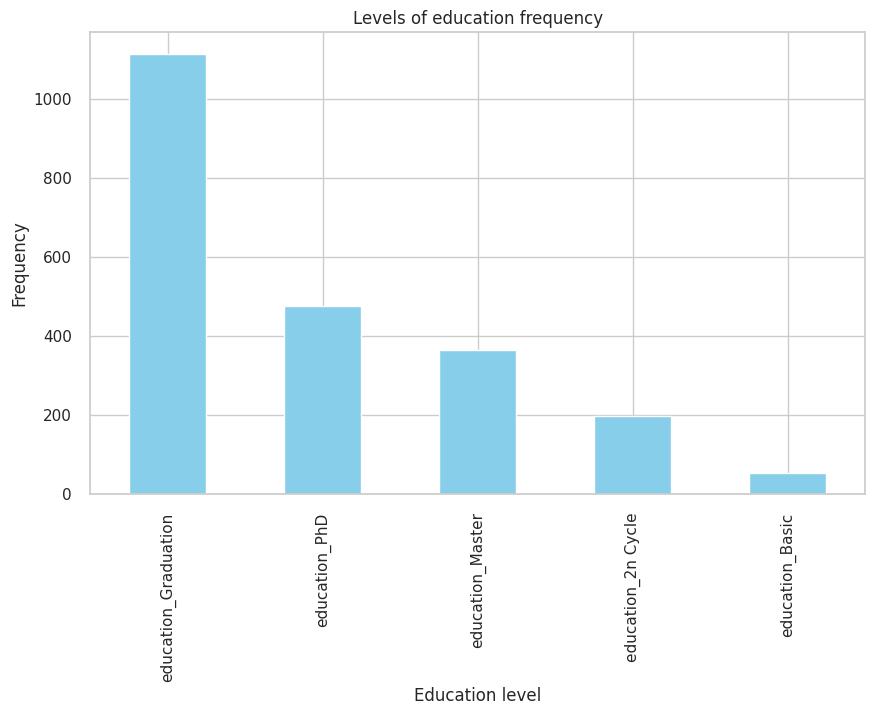

In [64]:
# Plot a bar chart to visualize the frequency of different education levels in the 'education_data' dataset.
plt.figure(figsize=(10, 6))
education_data['education_level'].value_counts().plot(kind='bar', color='skyblue')

# Set plot title and axis labels
plt.title('Levels of education frequency')
plt.xlabel('Education level')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### III.3) Marital Status Analysis

In [65]:
# Selecting only marital status features
marital_data = data[['marital_Divorced',
                 'marital_Married',
                 'marital_Single',
                 'marital_Together',
                 'marital_Widow']]

#Identifying whether only one marital status is possible (maximum sum = 1)
marital_data['overall_marital'] = data[['marital_Divorced',
                                 'marital_Married',
                                 'marital_Single',
                                 'marital_Together',
                                 'marital_Widow']].sum(axis=1)


marital_data.describe()


/tmp/ipykernel_1965/4056446426.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_data['overall_marital'] = data[['marital_Divorced',


,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,overall_marital
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0
mean,0.104308,0.387302,0.216327,0.257596,0.034467,1.0
std,0.305730,0.487244,0.411833,0.437410,0.182467,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [66]:
# Creating a single categorical column to designate marital status
marital_data.drop('overall_marital', axis=1)
marital_data['marital_status'] = marital_data[['marital_Divorced',
                                               'marital_Married',
                                               'marital_Single',
                                               'marital_Together',
                                               'marital_Widow']].idxmax(axis=1)


/tmp/ipykernel_1965/3696334288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_data['marital_status'] = marital_data[['marital_Divorced',


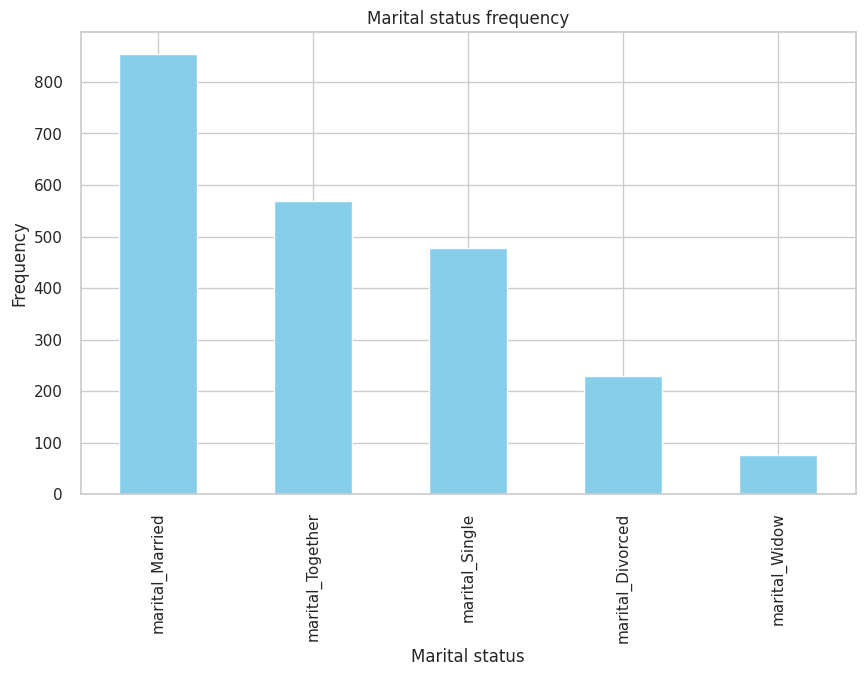

In [67]:
# Plot a bar chart to visualize the frequency of different marital statuses in the 'marital_data' dataset.
plt.figure(figsize=(10, 6))
marital_data['marital_status'].value_counts().plot(kind='bar', color='skyblue')

# Set plot title and axis labels
plt.title('Marital status frequency')
plt.xlabel('Marital status')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### III.4) Rebuilding Dataset

In [68]:
# Create a new DataFrame 'df' based on a copy of 'data' with simplified marital and education levels
df = data.copy()

# Extract the marital status with the highest value for each row
df['marital_level'] = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].idxmax(axis=1)

# Extract the education level with the highest value for each row
df['education_level'] = data[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].idxmax(axis=1)

# Remove prefix from marital and education level columns
df['marital_level'] = df['marital_level'].str.replace('marital_', '')
df['education_level'] = df['education_level'].str.replace('education_', '')

# Drop original columns used for extraction
df.drop(['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
         'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_level,education_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,3,11,1,63,2822,1529,1441,0,Single,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,11,0,66,2272,21,15,0,Single,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,3,11,0,55,2471,734,692,0,Together,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,11,0,36,2298,48,43,0,Together,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,11,0,39,2320,407,392,0,Married,PhD


In [69]:
# Creating classes of campaign acceptance:
# a) best_buyer: Accepted the campaign more than once
# b) first_buyer: Accepted in the first campaign
# c) regular_buyer: Accepted the offer between the first and last campaign
# d) not_buyer: Didn't accept the campaign

# If we have a best buyer that bought also in the first campaign, this client will be classified as best buyer

df['buyer_status'] = 'regular_buyer'

# Update buyer_status based on campaign acceptance criteria
df.loc[df['AcceptedCmpOverall'] > 1, 'buyer_status'] = 'best_buyer'
df.loc[(df['AcceptedCmp1'] == 1) & (df['AcceptedCmpOverall'] == 1), 'buyer_status'] = 'first_buyer'
df.loc[(df['AcceptedCmpOverall'] == 0) & (df['Response'] == 0), 'buyer_status'] = 'not_buyer'

# Drop columns related to individual campaign acceptances and overall acceptance
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall'], axis=1, inplace=True)


# Display the first few rows of the DataFrame with the new 'buyer_status' column
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,marital_level,education_level,buyer_status
0,58138.0,0,0,58,635,88,546,172,88,88,...,3,11,1,63,2822,1529,1441,Single,Graduation,regular_buyer
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,11,0,66,2272,21,15,Single,Graduation,not_buyer
2,71613.0,0,0,26,426,49,127,111,21,42,...,3,11,0,55,2471,734,692,Together,Graduation,not_buyer
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,11,0,36,2298,48,43,Together,Graduation,not_buyer
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,11,0,39,2320,407,392,Married,PhD,not_buyer


### III.5) Buyer status analysis

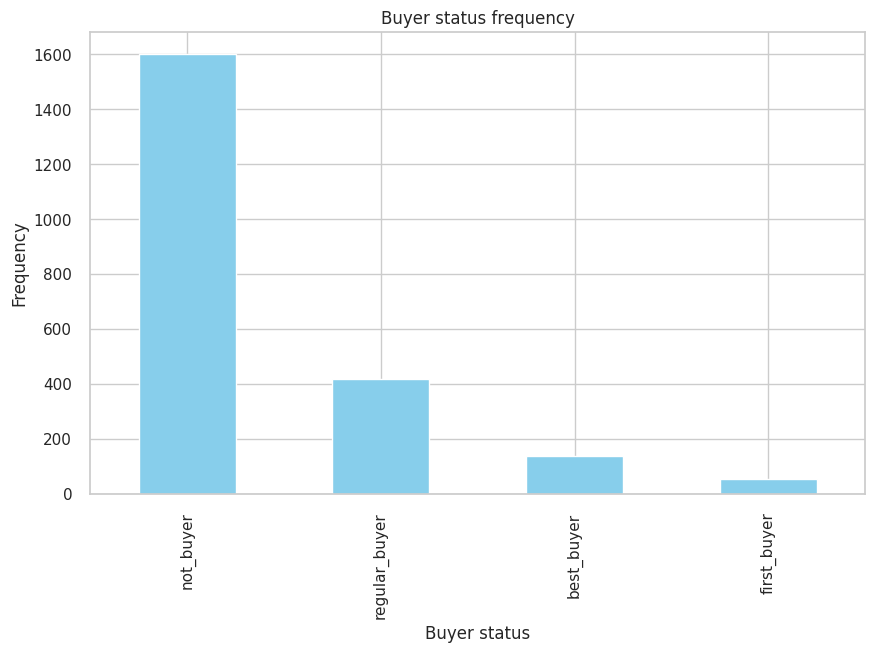

In [70]:
# Plot a bar chart to visualize the frequency of different buyer statuses in the 'df' DataFrame.
plt.figure(figsize=(10, 6))
df['buyer_status'].value_counts().plot(kind='bar', color='skyblue')

# Set plot title and axis labels
plt.title('Buyer status frequency')
plt.xlabel('Buyer status')
plt.ylabel('Frequency')

# Display the plot
plt.show()


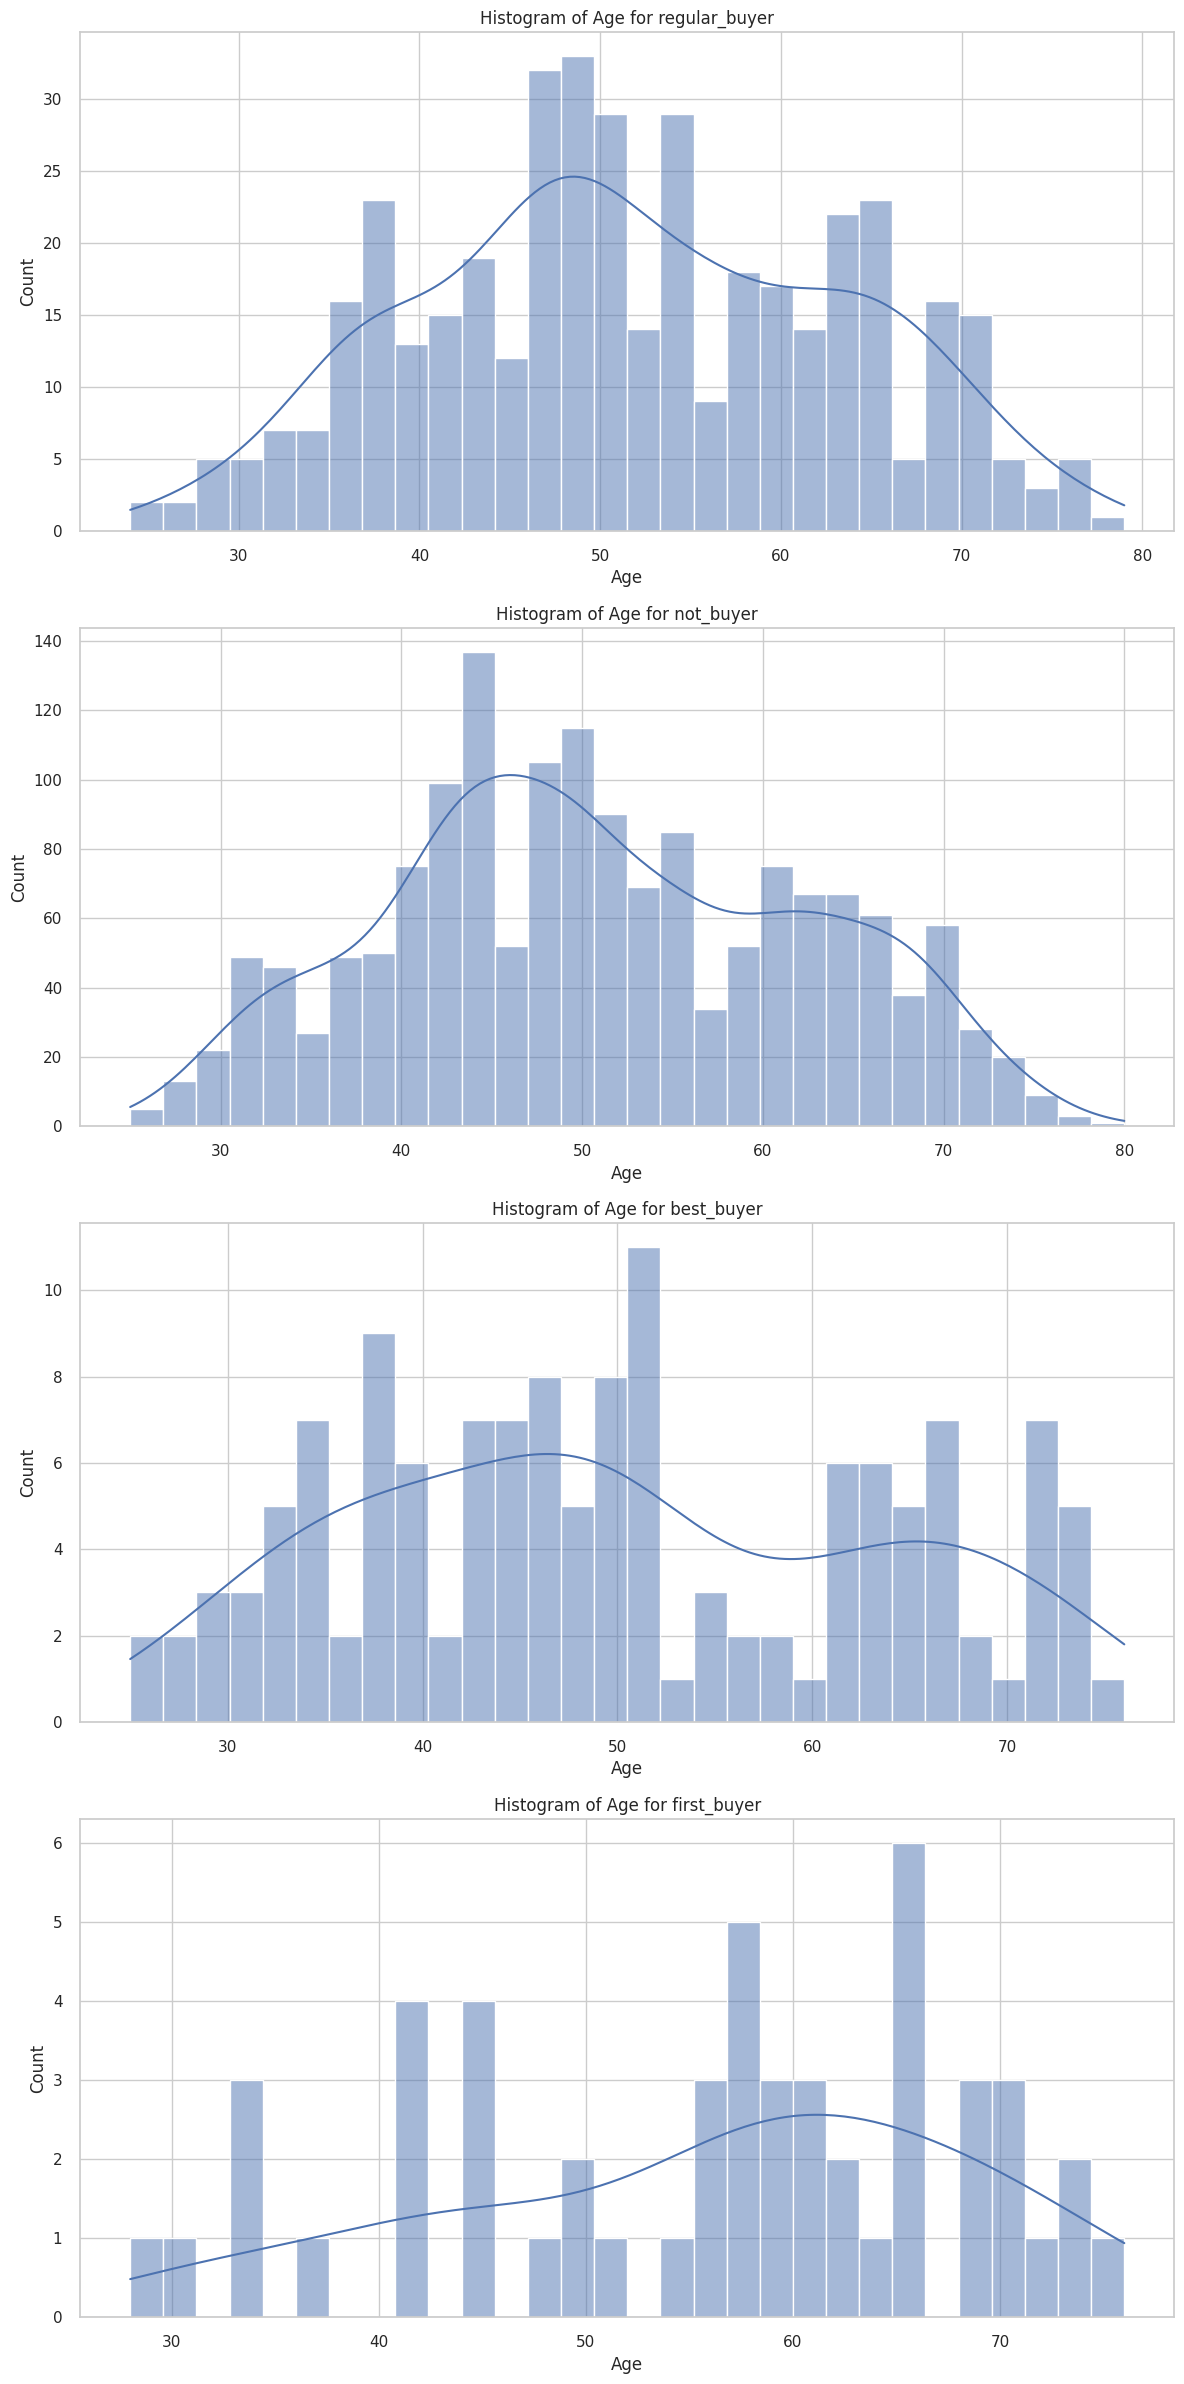

In [71]:
# Set seaborn style to whitegrid
sns.set(style="whitegrid")

# Get unique buyer statuses
buyer_statuses = df['buyer_status'].unique()

# Create subplots based on the number of unique buyer statuses
fig, axes = plt.subplots(nrows=len(buyer_statuses), figsize=(12, 6 * len(buyer_statuses)))

# Plot histograms of Age for each buyer status
for i, status in enumerate(buyer_statuses):
    subset = df[df['buyer_status'] == status]
    sns.histplot(subset['Age'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of Age for {status}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


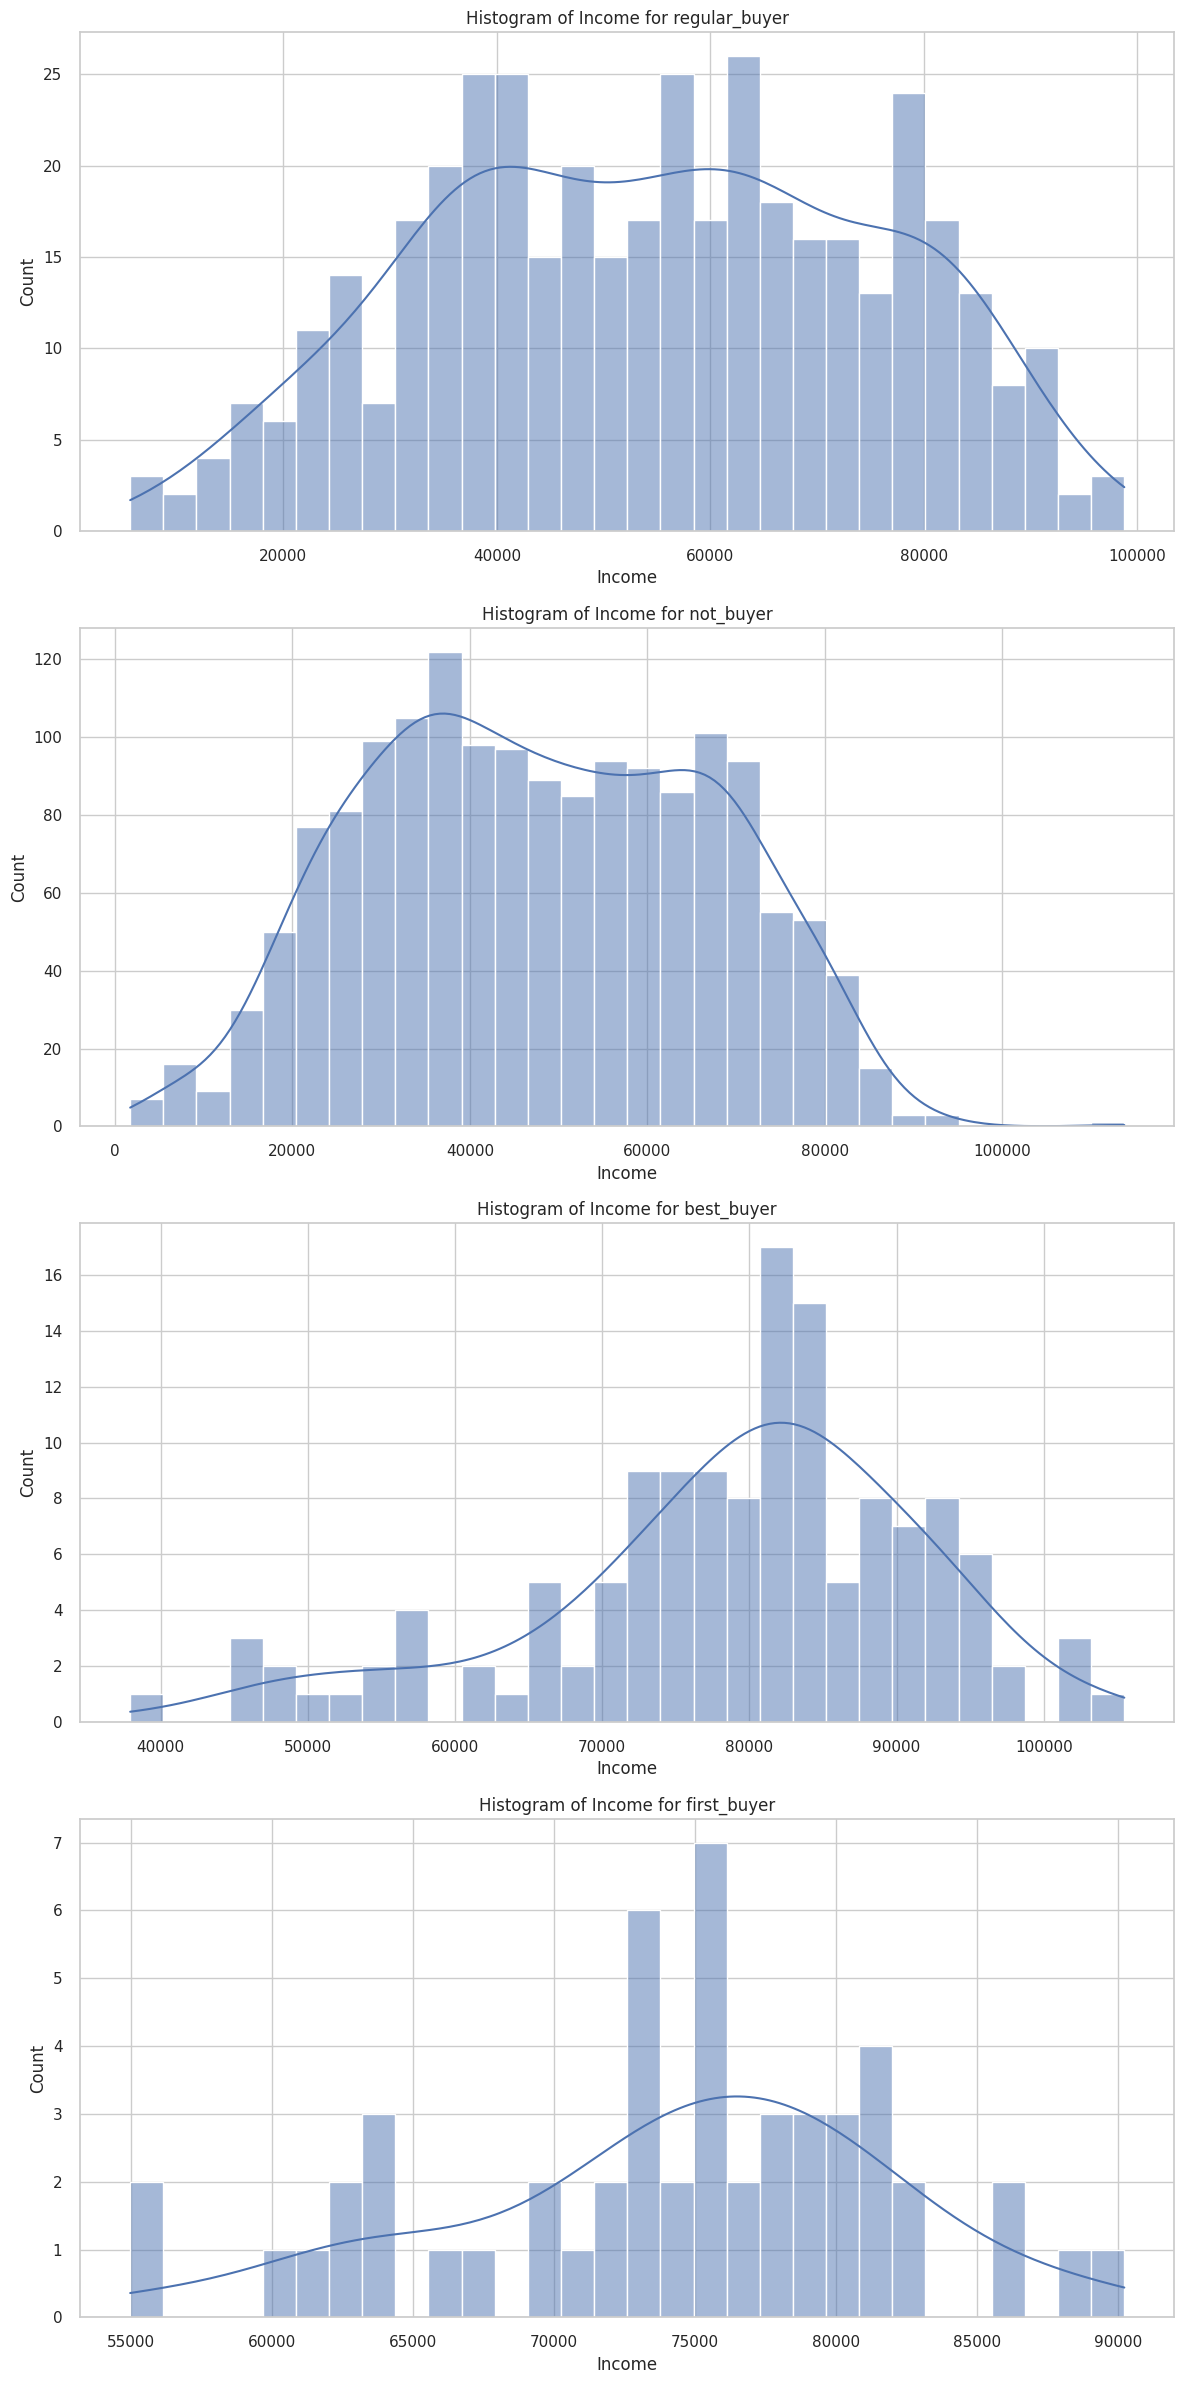

In [72]:
# Set seaborn style to whitegrid
sns.set(style="whitegrid")

# Get unique buyer statuses
buyer_statuses = df['buyer_status'].unique()

# Create subplots based on the number of unique buyer statuses
fig, axes = plt.subplots(nrows=len(buyer_statuses), figsize=(12, 6 * len(buyer_statuses)))

# Plot histograms of Income for each buyer status
for i, status in enumerate(buyer_statuses):
    subset = df[df['buyer_status'] == status]
    sns.histplot(subset['Income'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of Income for {status}')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


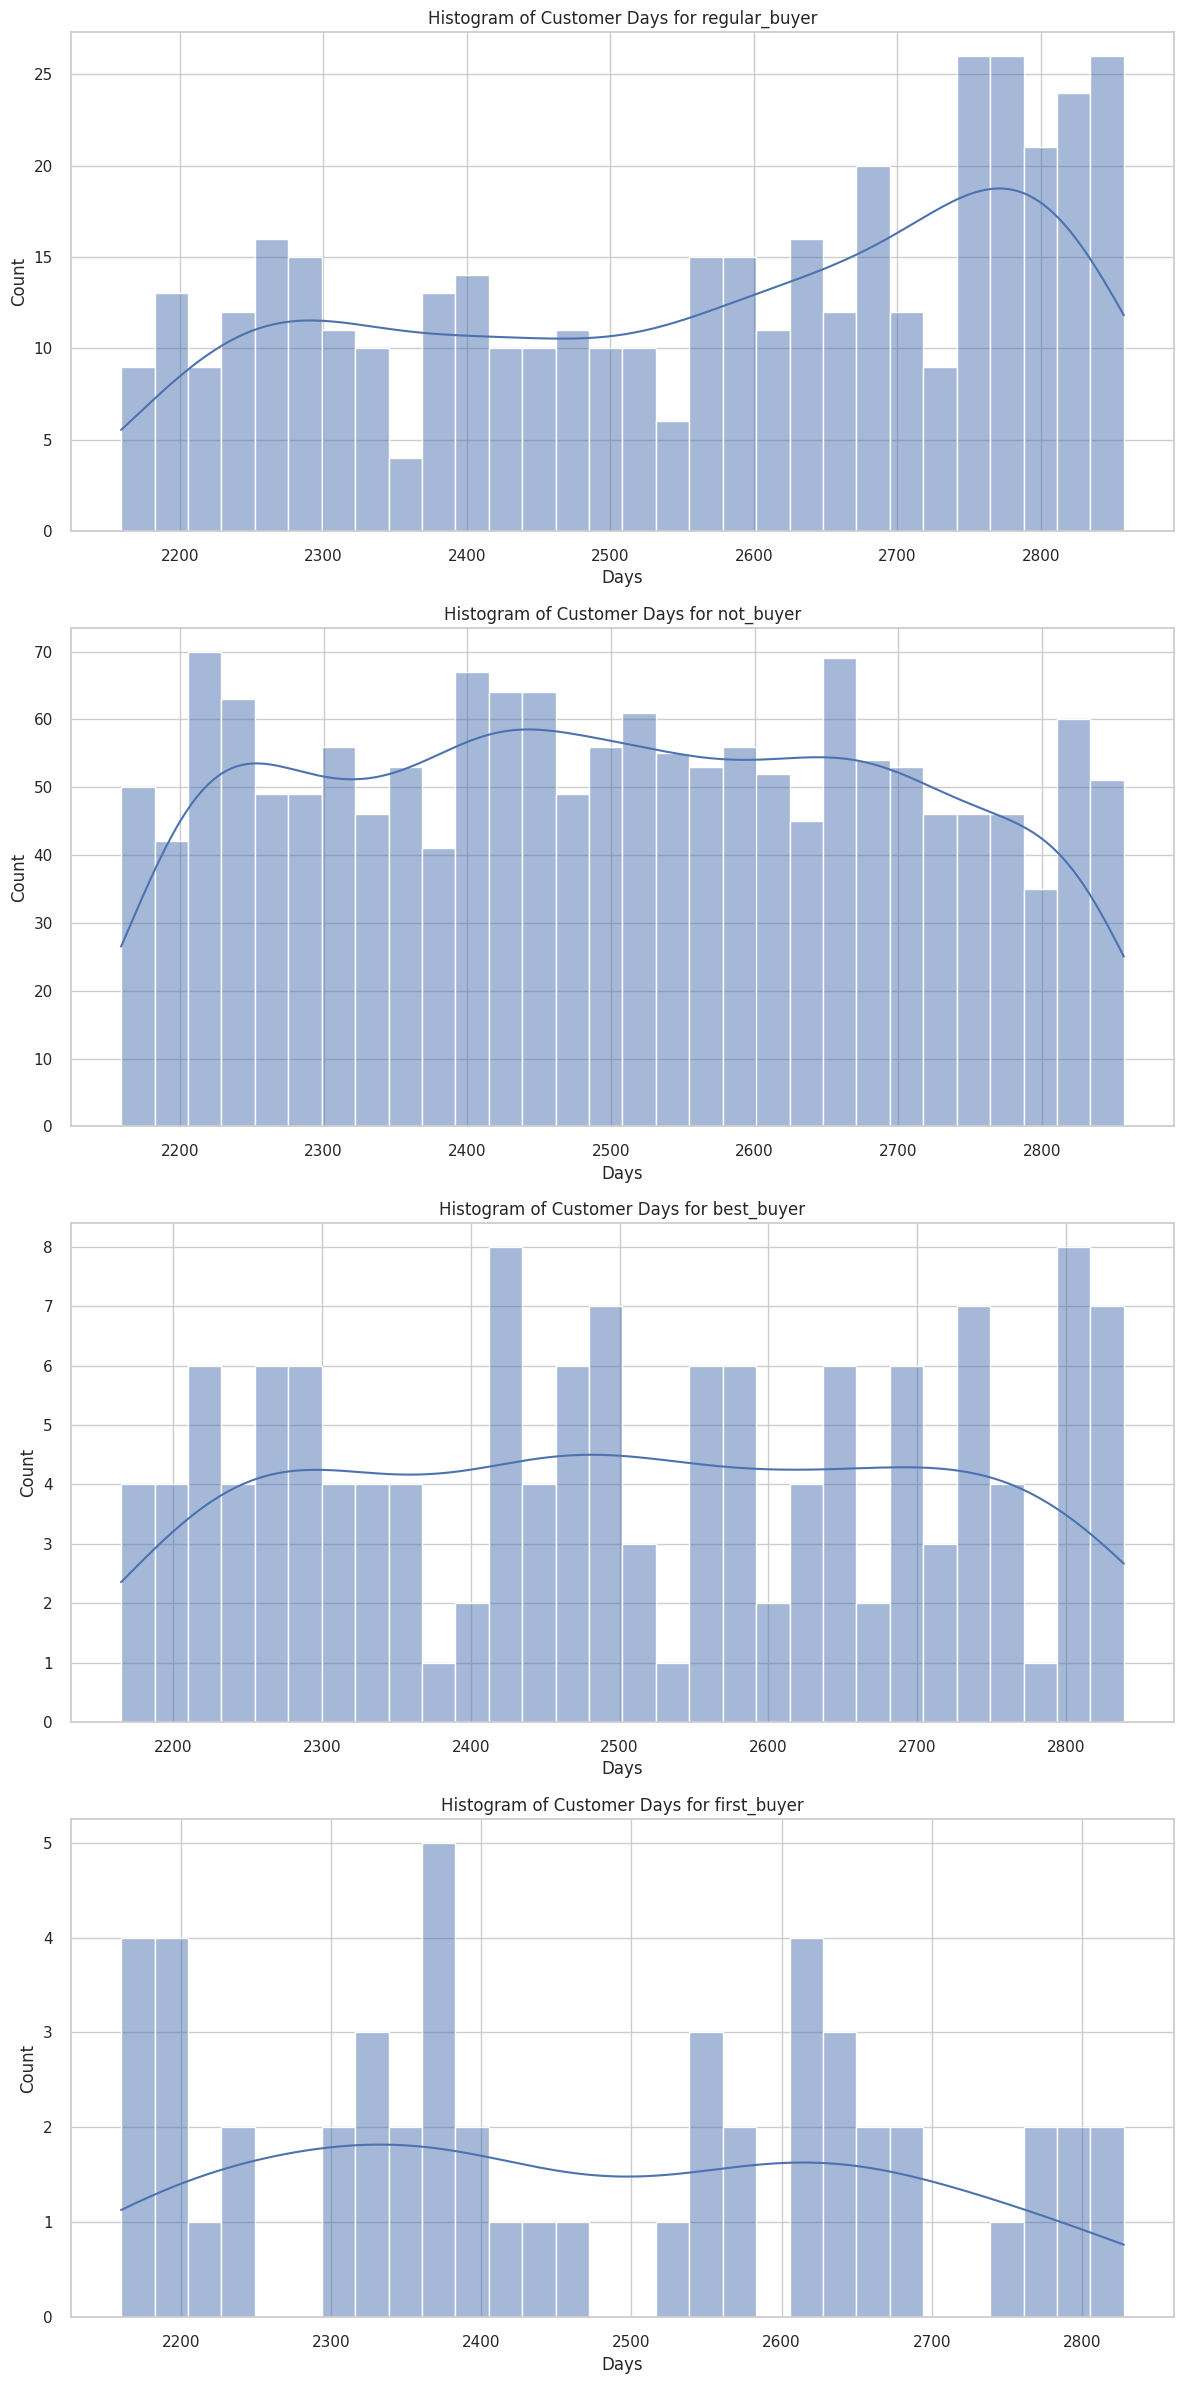

In [73]:
# Set seaborn style to whitegrid
sns.set(style="whitegrid")

# Get unique buyer statuses
buyer_statuses = df['buyer_status'].unique()

# Create subplots based on the number of unique buyer statuses
fig, axes = plt.subplots(nrows=len(buyer_statuses), figsize=(12, 6 * len(buyer_statuses)))

# Plot histograms of Customer_Days for each buyer status
for i, status in enumerate(buyer_statuses):
    subset = df[df['buyer_status'] == status]
    sns.histplot(subset['Customer_Days'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of Customer Days for {status}')
    axes[i].set_xlabel('Days')
    axes[i].set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


### III.6) Purchasing profile analysis

In [74]:
# Extract columns starting with 'Mnt' (excluding 'MntRegularProds' and 'MntTotal')
mnt_columns = [col for col in df.columns if col.startswith('Mnt')]
mnt_columns.remove('MntRegularProds')
mnt_columns.remove('MntTotal')

# Create new columns for each 'Mnt' column as a percentage of 'MntTotal'
for i in mnt_columns:
    df[i + '_percent'] = df[i] / df['MntTotal']

# Display the first few rows of the DataFrame with the new percentage columns
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntRegularProds,marital_level,education_level,buyer_status,MntWines_percent,MntFruits_percent,MntMeatProducts_percent,MntFishProducts_percent,MntSweetProducts_percent,MntGoldProds_percent
0,58138.0,0,0,58,635,88,546,172,88,88,...,1441,Single,Graduation,regular_buyer,0.415304,0.057554,0.357096,0.112492,0.057554,0.057554
1,46344.0,1,1,38,11,1,6,2,1,6,...,15,Single,Graduation,not_buyer,0.523810,0.047619,0.285714,0.095238,0.047619,0.285714
2,71613.0,0,0,26,426,49,127,111,21,42,...,692,Together,Graduation,not_buyer,0.580381,0.066757,0.173025,0.151226,0.028610,0.057221
3,26646.0,1,0,26,11,4,20,10,3,5,...,43,Together,Graduation,not_buyer,0.229167,0.083333,0.416667,0.208333,0.062500,0.104167
4,58293.0,1,0,94,173,43,118,46,27,15,...,392,Married,PhD,not_buyer,0.425061,0.105651,0.289926,0.113022,0.066339,0.036855


In [75]:
# Drop specified columns from the DataFrame
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


In [76]:
# Create a new column 'main_product' based on the maximum percentage among product categories
df['main_product'] = df[['MntWines_percent', 'MntFruits_percent', 'MntMeatProducts_percent',
                         'MntFishProducts_percent', 'MntSweetProducts_percent', 'MntGoldProds_percent']].idxmax(axis=1)

# Remove prefixes and suffixes from 'main_product' values
df['main_product'] = df['main_product'].str.replace('Mnt', '').str.replace('_percent', '')

# Display the first few rows of the DataFrame with the new 'main_product' column
df.head()


,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,...,marital_level,education_level,buyer_status,MntWines_percent,MntFruits_percent,MntMeatProducts_percent,MntFishProducts_percent,MntSweetProducts_percent,MntGoldProds_percent,main_product
0,58138.0,0,0,58,3,8,10,4,7,0,...,Single,Graduation,regular_buyer,0.415304,0.057554,0.357096,0.112492,0.057554,0.057554,Wines
1,46344.0,1,1,38,2,1,1,2,5,0,...,Single,Graduation,not_buyer,0.523810,0.047619,0.285714,0.095238,0.047619,0.285714,Wines
2,71613.0,0,0,26,1,8,2,10,4,0,...,Together,Graduation,not_buyer,0.580381,0.066757,0.173025,0.151226,0.028610,0.057221,Wines
3,26646.0,1,0,26,2,2,0,4,6,0,...,Together,Graduation,not_buyer,0.229167,0.083333,0.416667,0.208333,0.062500,0.104167,MeatProducts
4,58293.0,1,0,94,5,5,3,6,5,0,...,Married,PhD,not_buyer,0.425061,0.105651,0.289926,0.113022,0.066339,0.036855,Wines


In [77]:
# Create a new column 'main_channel' based on the maximum number of purchases among different channels
df['main_channel'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

# Remove prefixes and suffixes from 'main_channel' values
df['main_channel'] = df['main_channel'].str.replace('Num', '').str.replace('Purchases', '')

# Display the first few rows of the DataFrame with the new 'main_channel' column
df.head()


,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,...,education_level,buyer_status,MntWines_percent,MntFruits_percent,MntMeatProducts_percent,MntFishProducts_percent,MntSweetProducts_percent,MntGoldProds_percent,main_product,main_channel
0,58138.0,0,0,58,3,8,10,4,7,0,...,Graduation,regular_buyer,0.415304,0.057554,0.357096,0.112492,0.057554,0.057554,Wines,Catalog
1,46344.0,1,1,38,2,1,1,2,5,0,...,Graduation,not_buyer,0.523810,0.047619,0.285714,0.095238,0.047619,0.285714,Wines,Deals
2,71613.0,0,0,26,1,8,2,10,4,0,...,Graduation,not_buyer,0.580381,0.066757,0.173025,0.151226,0.028610,0.057221,Wines,Store
3,26646.0,1,0,26,2,2,0,4,6,0,...,Graduation,not_buyer,0.229167,0.083333,0.416667,0.208333,0.062500,0.104167,MeatProducts,Store
4,58293.0,1,0,94,5,5,3,6,5,0,...,PhD,not_buyer,0.425061,0.105651,0.289926,0.113022,0.066339,0.036855,Wines,Store


### III.7) General profile summary

The customer profile of this company has 51 years old in average, having an average of anual income of R$51622.09.
These are clients whose marital status is mostly Married, with a Graduation level of education and having, on average, 0 children and 1 teenagers at home.
There are 0.91 % of complaints.Most of them purchase Wines from Store.They are predominantly Married, with a Graduation level of education. On average, they have 1 children and 1 teenager living at home.
The purchasing profile is the following:


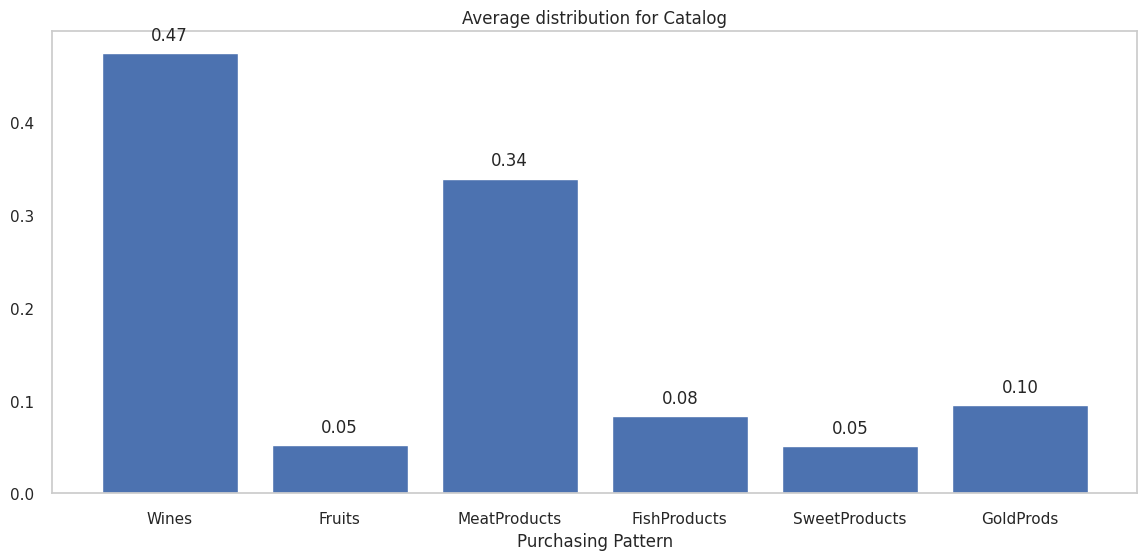

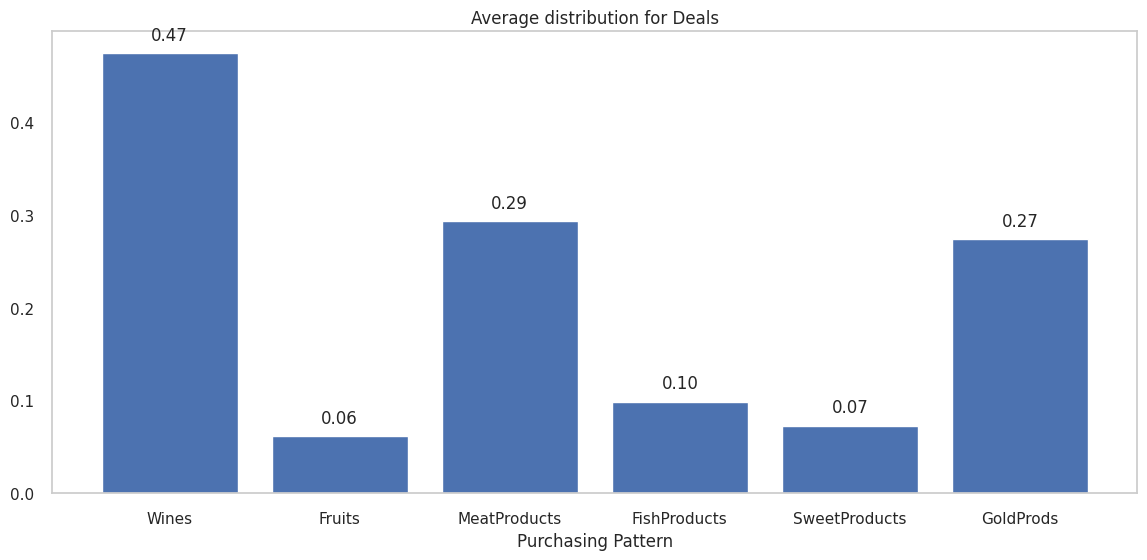

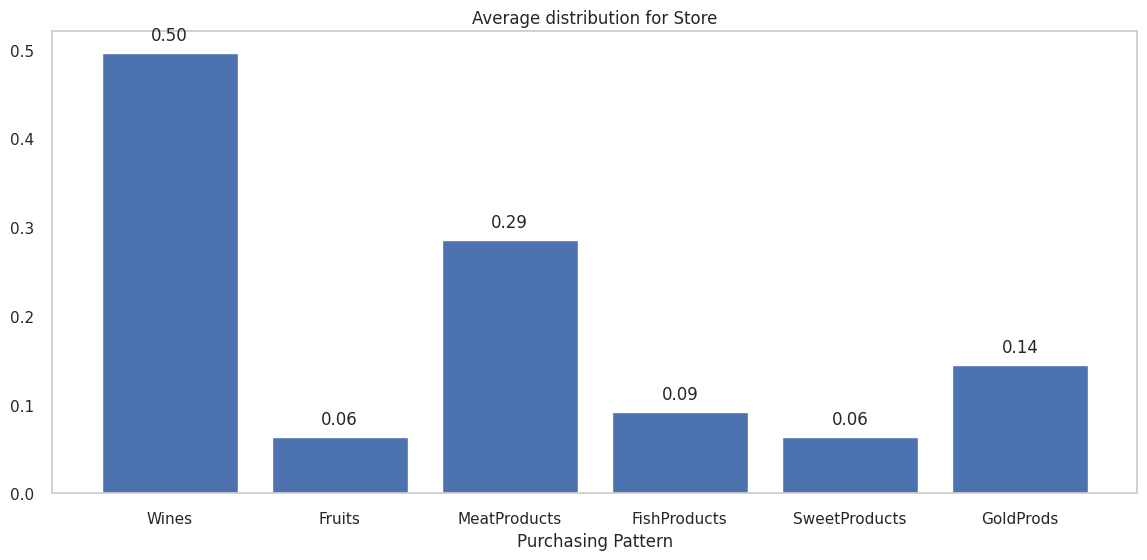

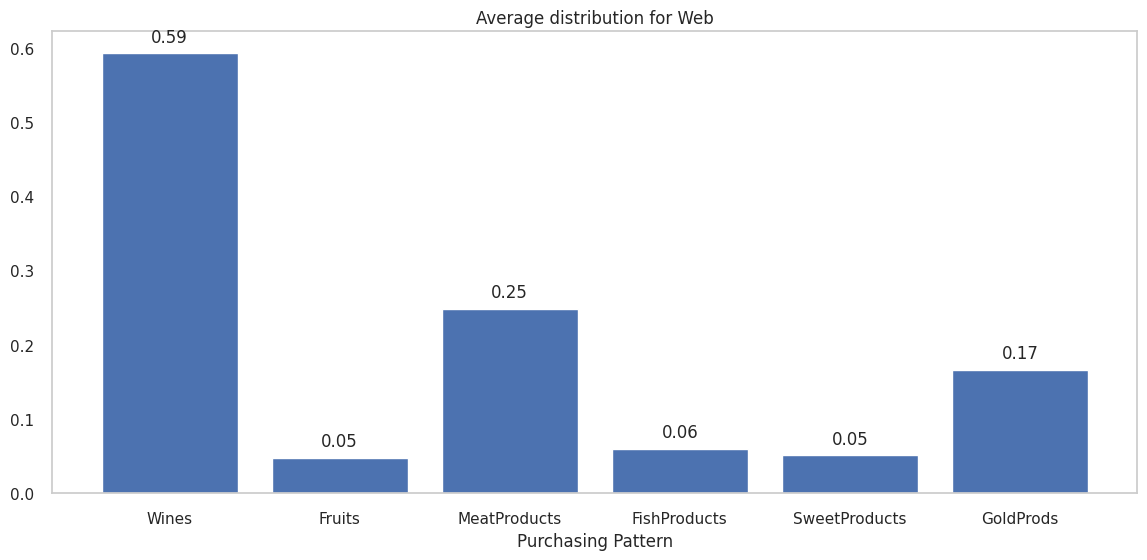

In [78]:
def profile(data):
    '''
    This function aims to create a summary of the consumer profile, identifying its main characteristics,
    as well as its highest value product and channel.
    '''

    print(f'The customer profile of this company has {round(data["Age"].mean())} years old in average, having an average of anual income of R${round(data["Income"].mean(),2)}.\n'
          f'These are clients whose marital status is mostly {data["marital_level"].mode()[0]}, with a {data["education_level"].mode()[0]} level of education and having, on average, {round(data["Kidhome"].mean())} children and {round(data["Teenhome"].mean())} teenagers at home.\n'
          f'There are {round(data["Complain"].mean()*100,2)} % of complaints.'
          f'Most of them purchase {data[data["Complain"]==1]["main_product"].mode()[0]} from {data[data["Complain"]==1]["main_channel"].mode()[0]}.'
          f'They are predominantly {data[data["Complain"]==1]["marital_level"].mode()[0]}, with a {data[data["Complain"]==1]["education_level"].mode()[0]} level of education. On average, they have {round(data[data["Complain"]==1]["Kidhome"].mean())} children and {round(data[data["Complain"]==1]["Teenhome"].mean())} teenager living at home.\n'
          f'The purchasing profile is the following:')

    def plot_channel_distribution(df, main_channel_values):
        '''
        The function aims to create a sales profile graph correlating the proportion of product sales for each sales channel.
        '''

        purchasing_pattern = [col for col in df.columns if col.startswith('Mnt') and col not in ['MntRegularProds', 'MntTotal']]

        for channel in main_channel_values:
            channel_df = df[df['main_channel'] == channel]
            average_distribution = channel_df[purchasing_pattern].mean()

            purchasing_pattern_display = [col.replace('Mnt', '').replace('_percent', '') for col in purchasing_pattern]

            plt.figure(figsize=(14, 6))
            plt.bar(purchasing_pattern_display, average_distribution)
            plt.title(f'Average distribution for {channel}')
            plt.xlabel('Purchasing Pattern')
            plt.grid(visible=False)

            for i, value in enumerate(average_distribution):
                plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

            plt.show()

    plot_channel_distribution(data, data['main_channel'].unique().tolist())

profile(df)


### III.8) Buyer analysis via campaign

In [79]:
# Create a new column 'buyer_class' based on the 'buyer_status'
df['buyer_class'] = np.where(df['buyer_status'] != 'not_buyer', 'Buyer', 'Not Buyer')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


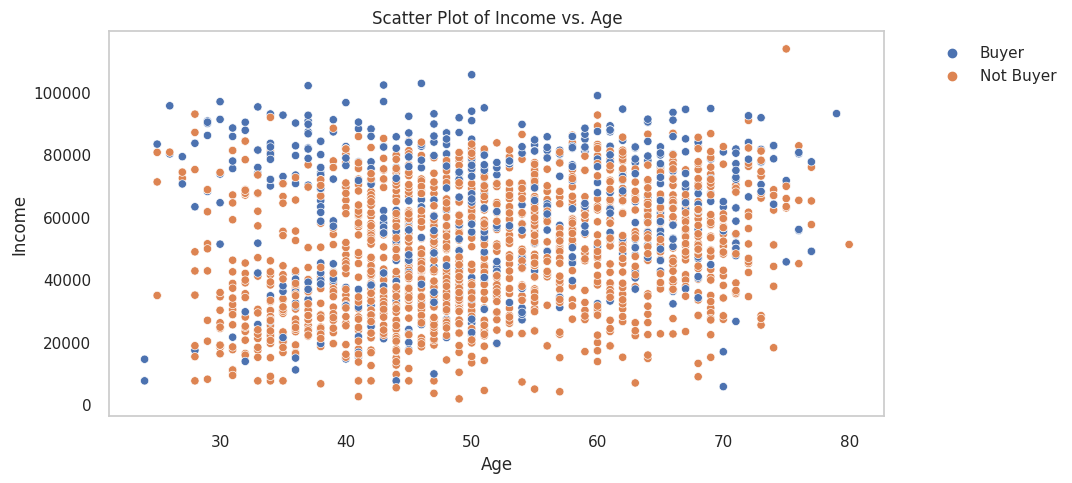

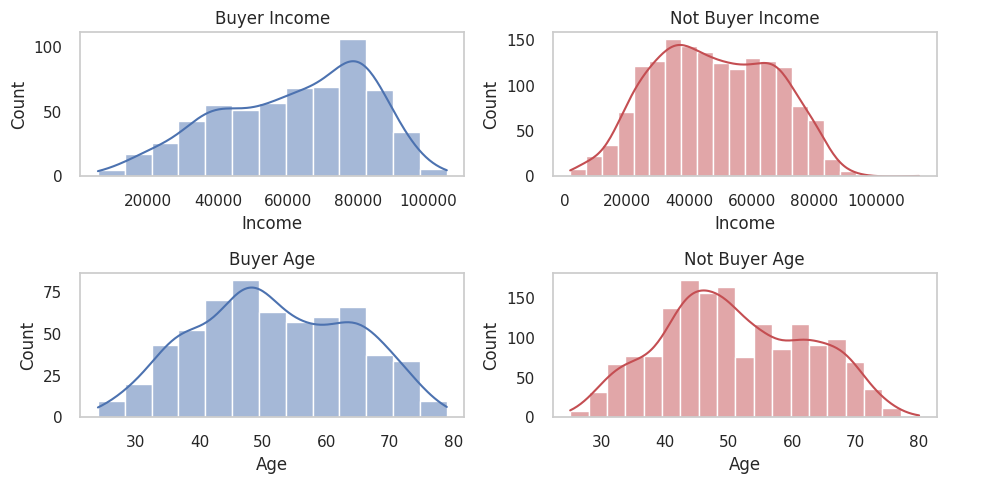

In [80]:
# Scatter plot of Income vs. Age with 'buyer_class' as hue
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['buyer_class'])
plt.title('Scatter Plot of Income vs. Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Filter the dataset as buyers and Not buyers
buy = df[df['buyer_class']=='Buyer']
not_buy = df[df['buyer_class']=='Not Buyer']

# Histograms of Income and Age for Buyers and Non-Buyers
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(df, x=buy['Income'], color='b', kde=True)
plt.title('Buyer Income')
plt.xlabel('Income')
plt.grid(False)

plt.subplot(2, 2, 2)
sns.histplot(df, x=not_buy['Income'], color='r', kde=True)
plt.title('Not Buyer Income')
plt.xlabel('Income')
plt.grid(False)

plt.subplot(2, 2, 3)
sns.histplot(df, x=buy['Age'], color='b', kde=True)
plt.title('Buyer Age')
plt.xlabel('Age')
plt.grid(False)

plt.subplot(2, 2, 4)
sns.histplot(df, x=not_buy['Age'], color='r', kde=True)
plt.title('Not Buyer Age')
plt.xlabel('Age')
plt.grid(False)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


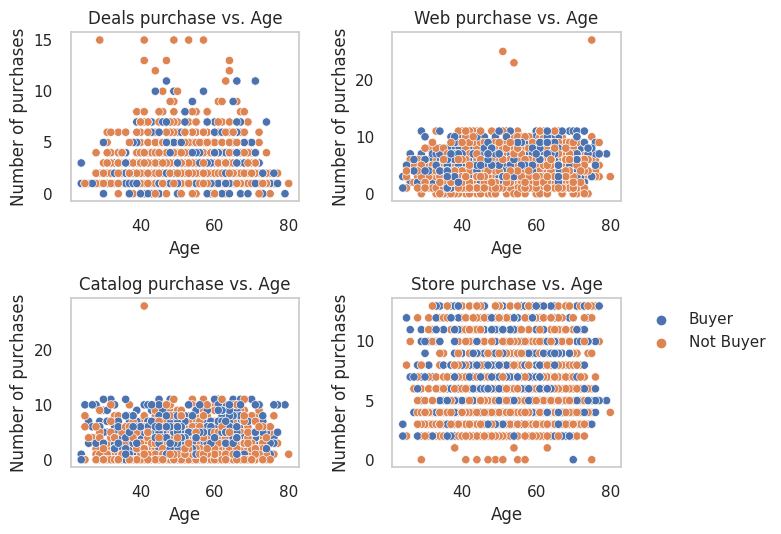

In [81]:
# Scatter plots showing the relationship between Age and the number of purchases in different channels,
# with 'buyer_class' as hue for better visualization.

# Subplot 1: Deals purchase vs. Age
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Age'], y=df['NumDealsPurchases'], hue=df['buyer_class'], legend=False)
plt.title('Deals purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of purchases')
plt.grid(False)

# Subplot 2: Web purchase vs. Age
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Age'], y=df['NumWebPurchases'], hue=df['buyer_class'], legend=False)
plt.title('Web purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of purchases')
plt.grid(False)

# Subplot 3: Catalog purchase vs. Age
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Age'], y=df['NumCatalogPurchases'], hue=df['buyer_class'], legend=False)
plt.title('Catalog purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of purchases')
plt.grid(False)

# Subplot 4: Store purchase vs. Age
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Age'], y=df['NumStorePurchases'], hue=df['buyer_class'])
plt.title('Store purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of purchases')
plt.grid(False)

# Display legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better visualization
plt.tight_layout()


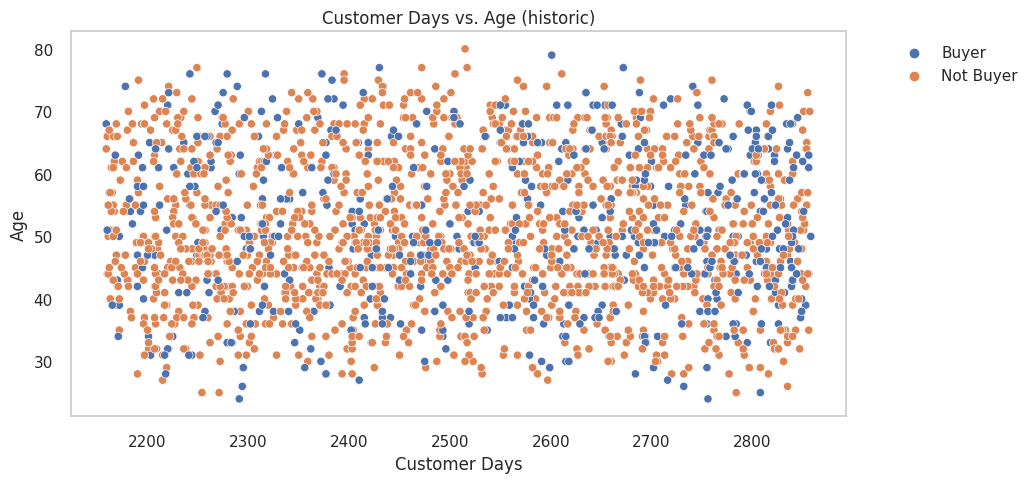

In [82]:
# Scatter plot showing the relationship between Customer Days and Age, with 'buyer_class' as hue.

plt.figure(figsize=(10, 5))

sns.scatterplot(x=df['Customer_Days'], y=df['Age'], hue=df['buyer_class'])
plt.title('Customer Days vs. Age (historic)')
plt.xlabel('Customer Days')
plt.ylabel('Age')

# Display legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)


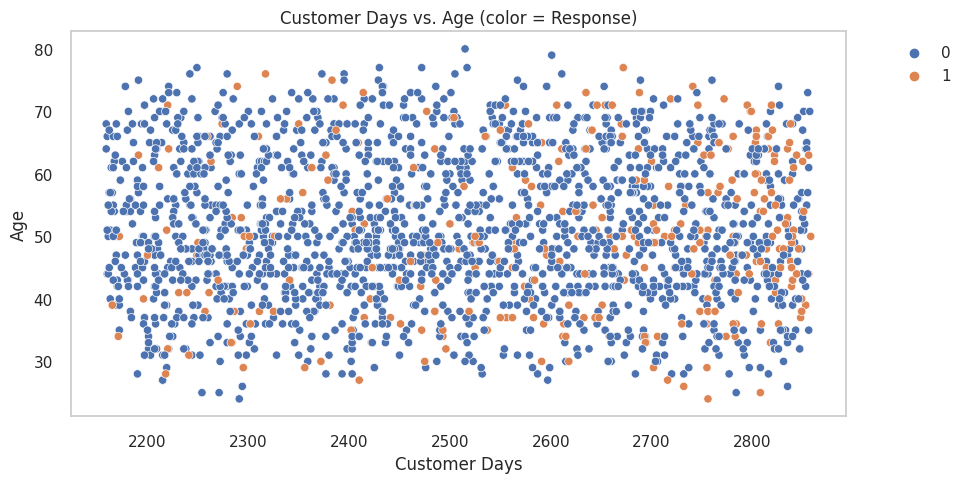

In [83]:
# Scatter plot showing the relationship between Customer Days and Age, with 'Response' as hue.

plt.figure(figsize=(10, 5))

sns.scatterplot(x=df['Customer_Days'], y=df['Age'], hue=df['Response'])
plt.title('Customer Days vs. Age (color = Response)')
plt.xlabel('Customer Days')
plt.ylabel('Age')

# Display legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)


### III.9) Complain analysis

The customer profile of this company has 52 years old in average, having an average of anual income of R$45672.4.
These are clients whose marital status is mostly Married, with a Graduation level of education and having, on average, 1 children and 1 teenagers at home.
There are 100.0 % of complaints.Most of them purchase Wines from Store.They are predominantly Married, with a Graduation level of education. On average, they have 1 children and 1 teenager living at home.
The purchasing profile is the following:


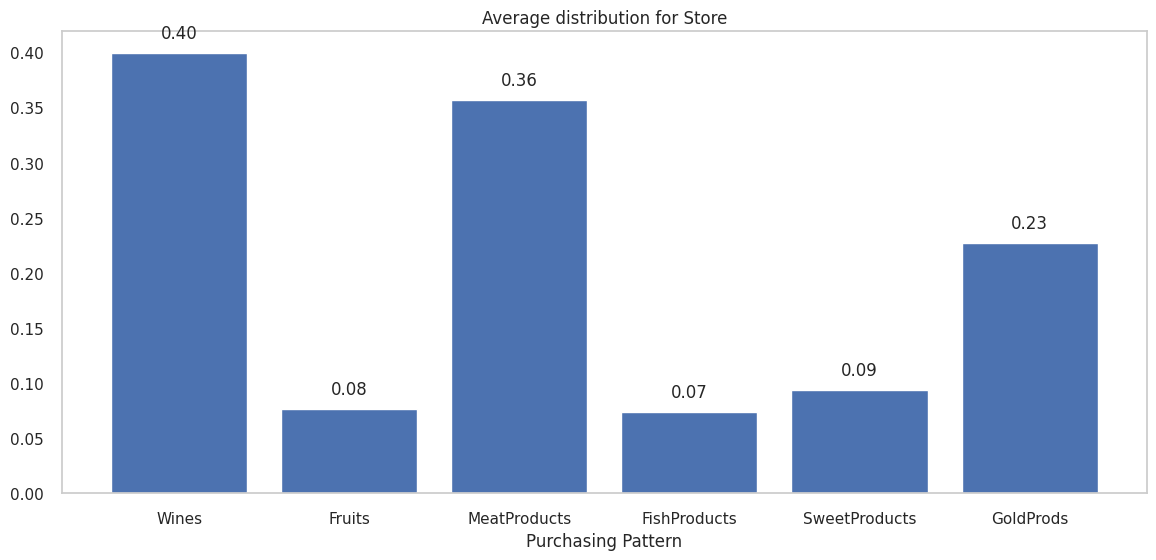

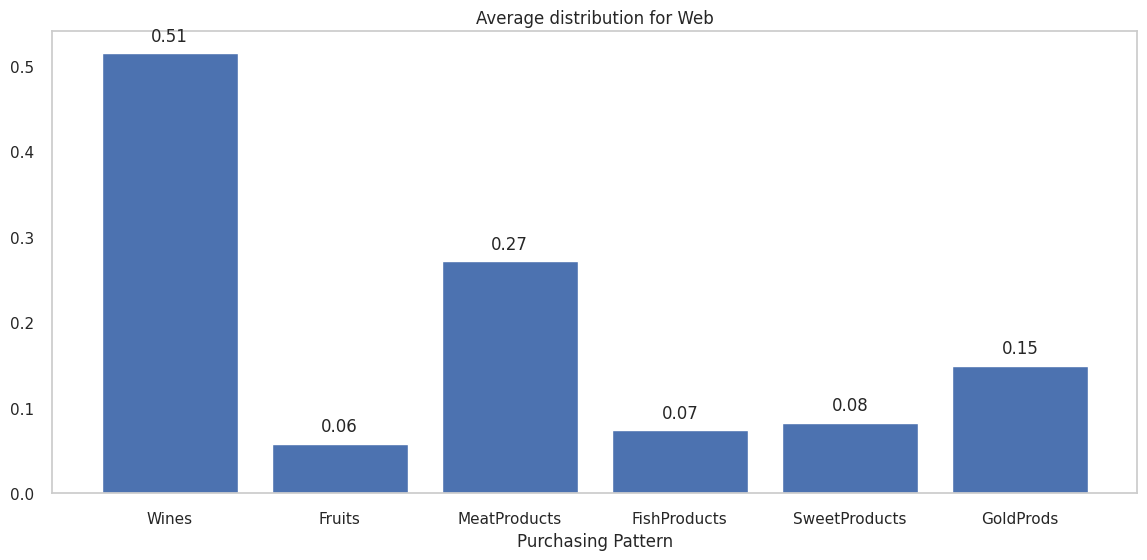

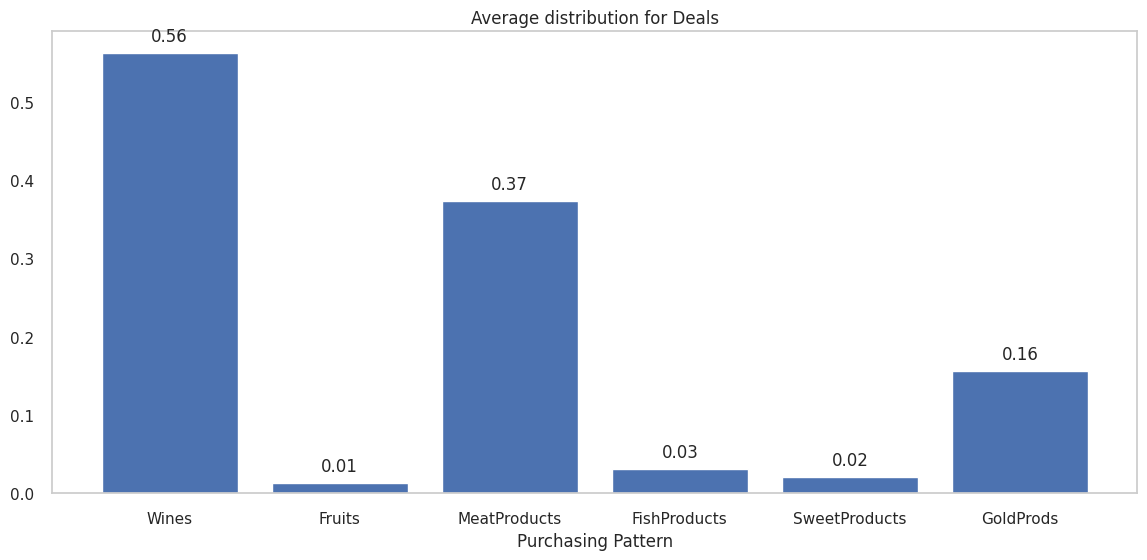

In [84]:
# Generating a customer profile summary specifically for clients who have complaints (Complain == 1).
profile(df[df['Complain'] == 1])


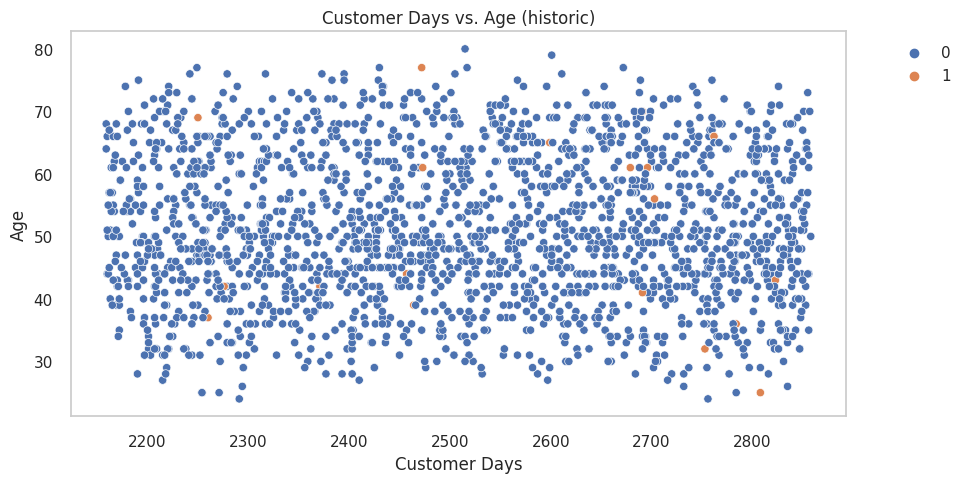

In [85]:
# Scatter plot showing the relationship between Customer Days and Age, with 'Complain' as hue.

plt.figure(figsize=(10, 5))

sns.scatterplot(x=df['Customer_Days'], y=df['Age'], hue=df['Complain'])
plt.title('Customer Days vs. Age (historic)')
plt.xlabel('Customer Days')
plt.ylabel('Age')

# Display legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)


### III.10) Response (target) balance analysis

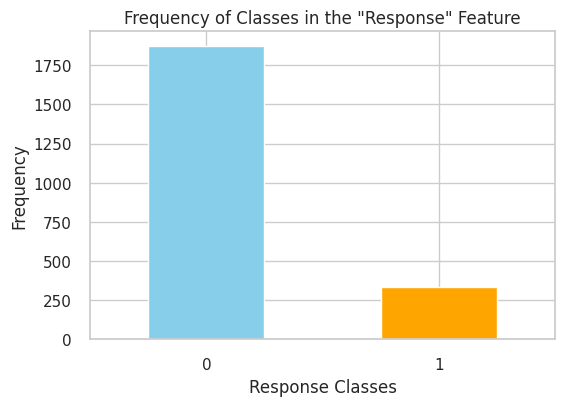

In [86]:
# Plotting the frequency chart
plt.figure(figsize=(6, 4))

# Counting the occurrences of each class in the 'Response' column and plotting as a bar chart
df['Response'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

# Adding title and axis labels
plt.title('Frequency of Classes in the "Response" Feature')
plt.xlabel('Response Classes')
plt.ylabel('Frequency')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Displaying the plot
plt.show()

# IV. Data Cleaning and Preparation
##### This phase focuses on cleaning and transforming the data to ensure it is in a suitable format for analysis. Tasks may include handling missing values, addressing outliers, and organizing the data structure.

### IV.1) Duplicates treatment

In [87]:
# Counting the number of duplicate rows in the DataFrame.
df.duplicated().sum()


184

In [88]:
# Removing duplicate rows from the DataFrame.
df = df.drop_duplicates()


In [89]:
# Checking and displaying the count of missing values in each column, sorted in descending order.
df.isnull().sum().sort_values(ascending=False)


Income                      0
MntRegularProds             0
main_channel                0
main_product                0
MntGoldProds_percent        0
MntSweetProducts_percent    0
MntFishProducts_percent     0
MntMeatProducts_percent     0
MntFruits_percent           0
MntWines_percent            0
buyer_status                0
education_level             0
marital_level               0
MntTotal                    0
Kidhome                     0
Customer_Days               0
Age                         0
Response                    0
Complain                    0
NumWebVisitsMonth           0
NumStorePurchases           0
NumCatalogPurchases         0
NumWebPurchases             0
NumDealsPurchases           0
Recency                     0
Teenhome                    0
buyer_class                 0
dtype: int64

### IV.2) Null/empty treatment

In [90]:
# Checking for the presence of null or empty values in the DataFrame
df.isnull().sum()


Income                      0
Kidhome                     0
Teenhome                    0
Recency                     0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
Complain                    0
Response                    0
Age                         0
Customer_Days               0
MntTotal                    0
MntRegularProds             0
marital_level               0
education_level             0
buyer_status                0
MntWines_percent            0
MntFruits_percent           0
MntMeatProducts_percent     0
MntFishProducts_percent     0
MntSweetProducts_percent    0
MntGoldProds_percent        0
main_product                0
main_channel                0
buyer_class                 0
dtype: int64

### IV.3) Evaluation of distribution of numerical variables

In [91]:
# Extracting a subset of numeric features from the DataFrame.
x_numeric = df[['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds']]


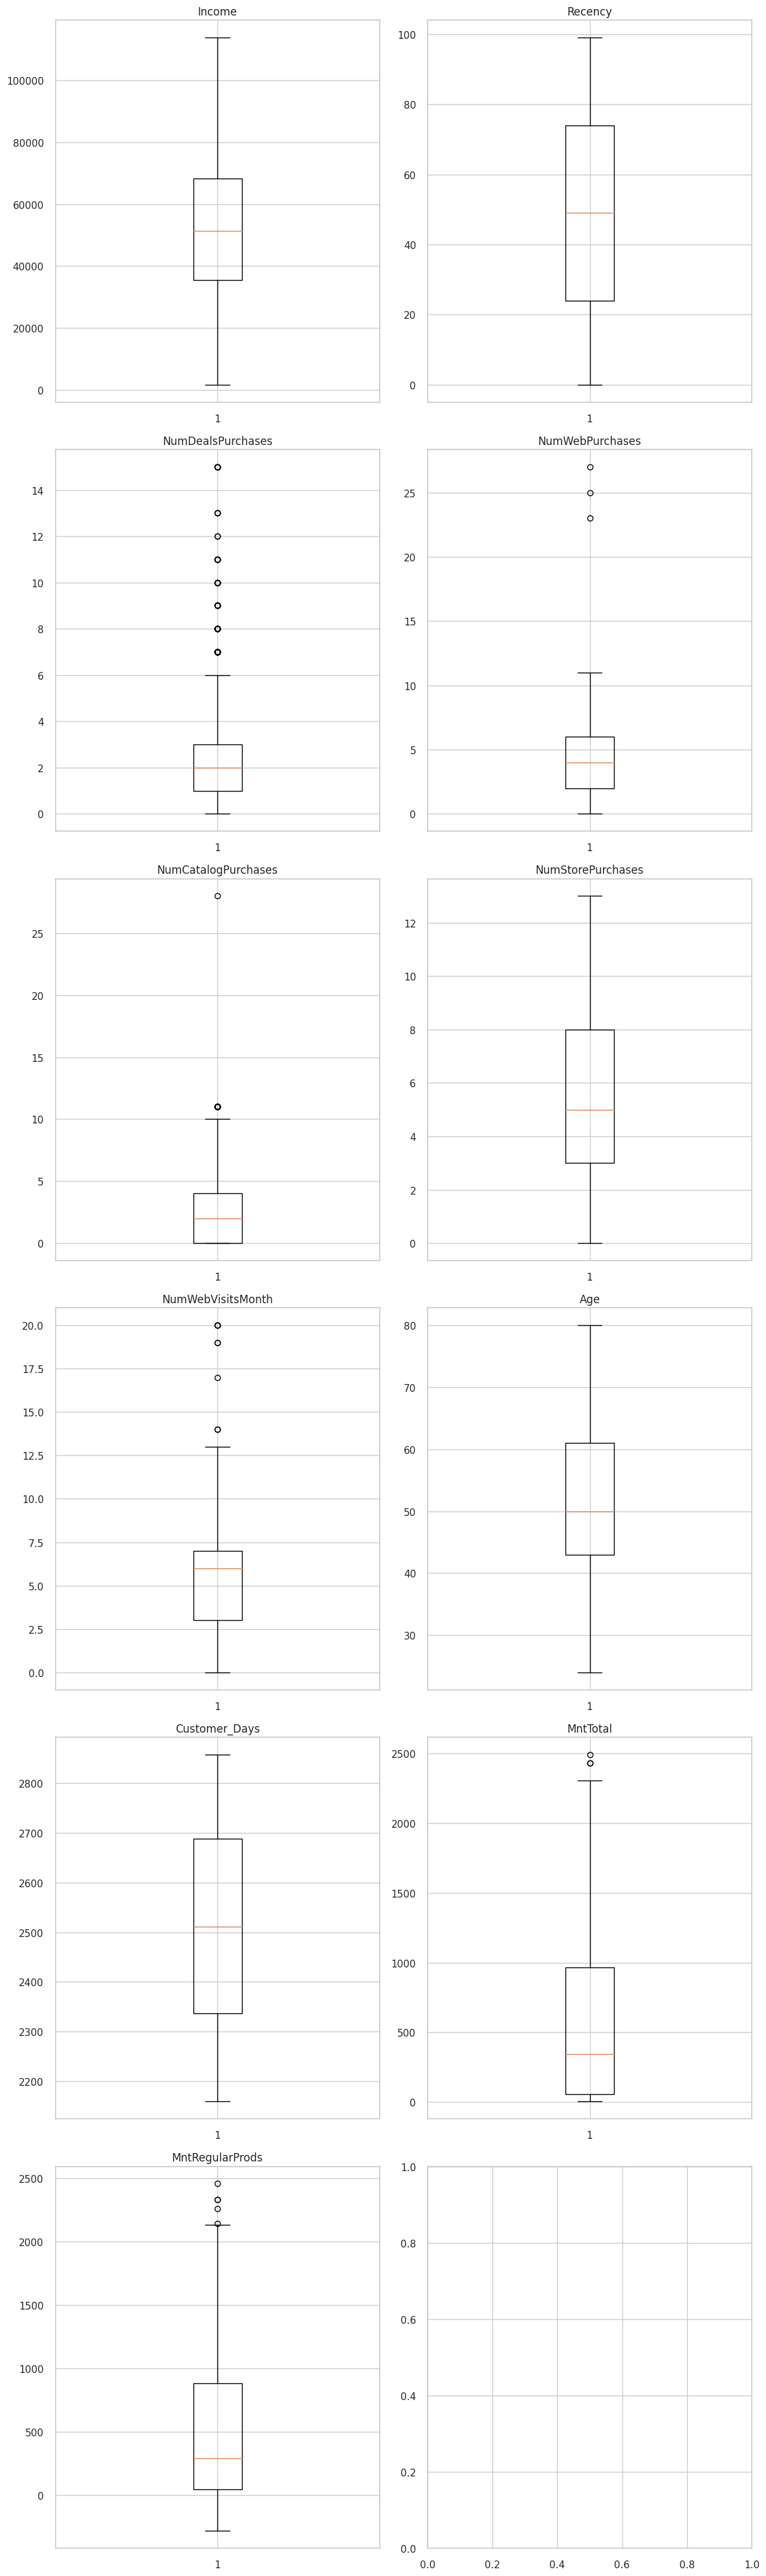

In [92]:
# Creating subplots for boxplots of numeric columns
fig, axes = plt.subplots(6, 2, figsize=(12, 40))

# Iterating through each numeric column and creating a boxplot
for i, column in enumerate(x_numeric.columns):
    row, col = divmod(i, 2)
    axes[row, col].boxplot(x_numeric[column])
    axes[row, col].set_title(column)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


### IV.4) Scaling numerical variables

In [93]:
# Creating a RobustScaler instance
rb_scaler = RobustScaler()

# Fitting the scaler to the selected numeric columns and transforming the data
rb_scaler.fit(df[['Income','Recency', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumWebVisitsMonth','Age', 'Customer_Days', 'MntTotal',
                   'MntRegularProds']])

df[['Income','Recency', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth','Age', 'Customer_Days', 'MntTotal',
    'MntRegularProds']] = rb_scaler.transform(df[['Income','Recency', 'NumDealsPurchases',
                                                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                                                   'NumWebVisitsMonth','Age', 'Customer_Days', 'MntTotal',
                                                   'MntRegularProds']])

df.head()


,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,...,buyer_status,MntWines_percent,MntFruits_percent,MntMeatProducts_percent,MntFishProducts_percent,MntSweetProducts_percent,MntGoldProds_percent,main_product,main_channel,buyer_class
0,0.204699,0,0,0.18,0.5,1.00,2.00,-0.2,0.25,0,...,regular_buyer,0.415304,0.057554,0.357096,0.112492,0.057554,0.057554,Wines,Catalog,Buyer
1,-0.154239,1,1,-0.22,0.0,-0.75,-0.25,-0.6,-0.25,0,...,not_buyer,0.523810,0.047619,0.285714,0.095238,0.047619,0.285714,Wines,Deals,Not Buyer
2,0.614797,0,0,-0.46,-0.5,1.00,0.00,1.0,-0.50,0,...,not_buyer,0.580381,0.066757,0.173025,0.151226,0.028610,0.057221,Wines,Store,Not Buyer
3,-0.753728,1,0,-0.46,0.0,-0.50,-0.50,-0.2,0.00,0,...,not_buyer,0.229167,0.083333,0.416667,0.208333,0.062500,0.104167,MeatProducts,Store,Not Buyer
4,0.209416,1,0,0.90,1.5,0.25,0.25,0.2,-0.25,0,...,not_buyer,0.425061,0.105651,0.289926,0.113022,0.066339,0.036855,Wines,Store,Not Buyer


### IV.5) Encoding categorical variables where one class has more value than another

In [94]:
# Creating an OrdinalEncoder instance
ord_enc = OrdinalEncoder()

# Fitting the encoder to the selected columns and transforming the data
ord_enc.fit(df[['buyer_status', 'buyer_class']])
display(ord_enc.categories_)
df[['buyer_status', 'buyer_class']] = ord_enc.transform(df[['buyer_status', 'buyer_class']])


[array(['best_buyer', 'first_buyer', 'not_buyer', 'regular_buyer'],
       dtype=object),
 array(['Buyer', 'Not Buyer'], dtype=object)]

### IV.6) Encoding categorical variables where there is no difference between classes

In [95]:
# Creating a OneHotEncoder instance
ohe = OneHotEncoder(sparse=False)

# Fitting the encoder to the specified columns and transforming the data
ohe.fit(df[['marital_level', 'education_level', 'main_product', 'main_channel']])
df[ohe.get_feature_names_out()] = ohe.transform(df[['marital_level', 'education_level', 'main_product', 'main_channel']])

# Dropping the original columns after one-hot encoding
df.drop(columns=['marital_level', 'education_level', 'main_product', 'main_channel'], inplace=True)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# V. Baseline modeling
##### Baseline modeling establishes an initial predictive model using simple algorithms or default parameters. This serves as a benchmark for more complex models, helping evaluate their performance.

In [96]:
#Using the original dataset with all features
data_base = data.copy()
data_base.describe()
data_base = data_base.drop_duplicates()


In [97]:
def non_binary_selection(dataframe):
    '''
    Select non binary columns in a dataframe
    '''
    non_binary = []
    for coluna in dataframe.columns:
        if len(dataframe[coluna].unique()) > 2:
            non_binary.append(coluna)

    novo_dataframe = dataframe[non_binary]

    return novo_dataframe


nb = non_binary_selection(data_base)


In [98]:
# Creating a RobustScaler instance
rb_scaler_base = RobustScaler()

# Fitting the scaler to the specified columns and transforming the data
rb_scaler_base.fit(nb)
data_base[nb.columns] = rb_scaler_base.transform(data_base[nb.columns])


In [99]:
x_base = data_base.drop('Response',axis = 1)
y_base = data_base['Response']

# Splitting the data into training and testing sets
x_train_base, x_test_b, y_train_base, y_test_b = train_test_split(x_base, y_base, test_size=0.20)

#Creating synthetic data to balance the classes
smote = SMOTE(random_state=42)
x_train_b, y_train_b = smote.fit_resample(x_train_base, y_train_base)

# Displaying the shapes of the resulting sets
print("Training set shapes:", x_train_b.shape, y_train_b.shape)
print("Testing set shapes:", x_test_b.shape, y_test_b.shape)


Training set shapes: (2726, 38) (2726,)
Testing set shapes: (405, 38) (405,)


In [100]:
def model_evaluation(y_pred,y_test,y_train,x_train,x_test,model):
    '''
    This function aims to show the main model evaluation metrics (accuracy, recall, precision and f1), as well as the confusion matrix.
    '''
    # Accuracy: The overall percentage of correct predictions made by the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acuracy: {accuracy:.4f}. (The overall percentage of correct predictions made by the model)')

    # Precision: The ratio of correct positive predictions to the total positive predictions made by the model
    precision = precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}(The ratio of correct positive predictions to the total positive predictions made by the model)')

    # Recall: The ratio of correct positive predictions to the total actual positive cases
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4f} (The ratio of correct positive predictions to the total actual positive cases.)')

    # F1-score: A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes
    f1 = f1_score(y_test, y_pred)
    print(f'F1-score: {f1:.4f} ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)')

    #Confusion metrix
    cm = confusion_matrix(model,x_train,y_train,x_test,y_test)
    cm.show;


### V.1) Logistic regression - Baseline

/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Acuracy: 0.8593. (The overall percentage of correct predictions made by the model)
Precision: 0.5072(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.6034 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.5512 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


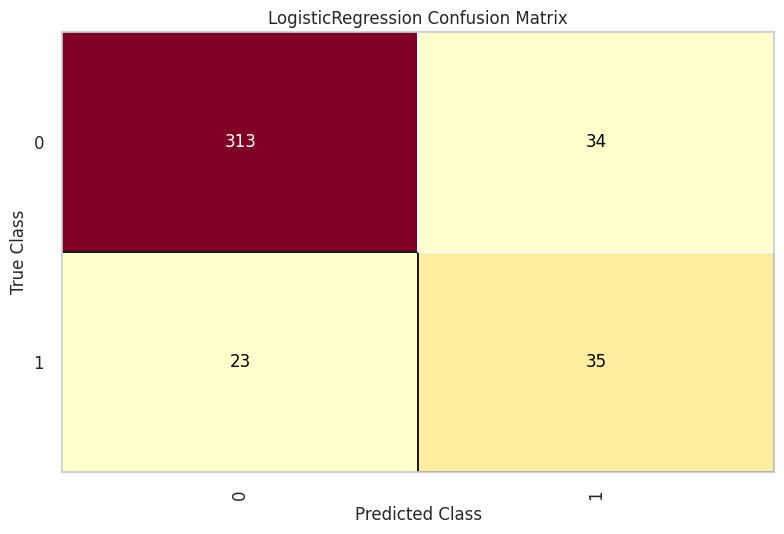

In [101]:
# Creating and fitting the Logistic Regression model
lg_base = LogisticRegression()
lg_base.fit(x_train_b, y_train_b)

# Making predictions
y_pred_b = lg_base.predict(x_test_b)

# Evaluating the model
model_evaluation(y_pred_b,y_test_b,y_train_b,x_train_b,x_test_b,lg_base)


### V.2) SVM - Baseline

Acuracy: 0.8642. (The overall percentage of correct predictions made by the model)
Precision: 0.5217(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.6207 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.5669 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


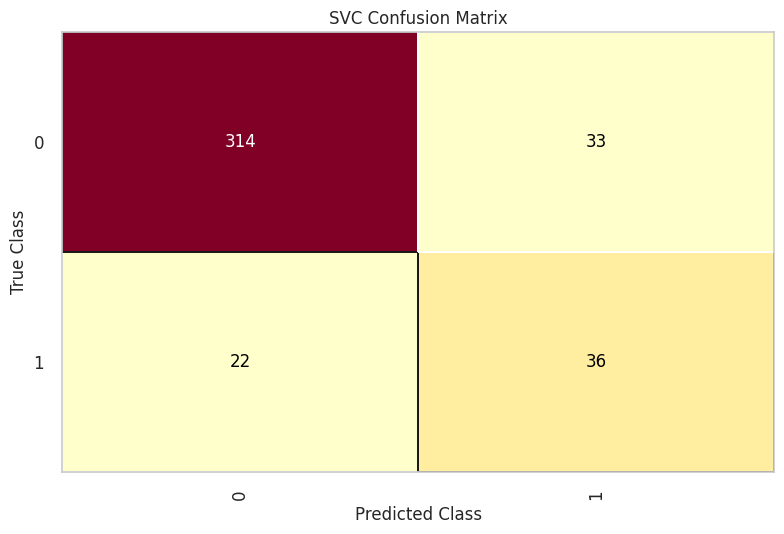

In [102]:
# Creating and fitting the Support Vector Machine (SVM) model with a linear kernel
model_svm_base = svm.SVC(kernel='linear')
model_svm_base.fit(x_train_b, y_train_b)

# Making predictions
y_pred_b = model_svm_base.predict(x_test_b)

# Evaluating the model
model_evaluation(y_pred_b,y_test_b,y_train_b,x_train_b,x_test_b,model_svm_base)


### V.3) Random forest - Baseline

Acuracy: 0.8716. (The overall percentage of correct predictions made by the model)
Precision: 0.5577(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.5000 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.5273 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


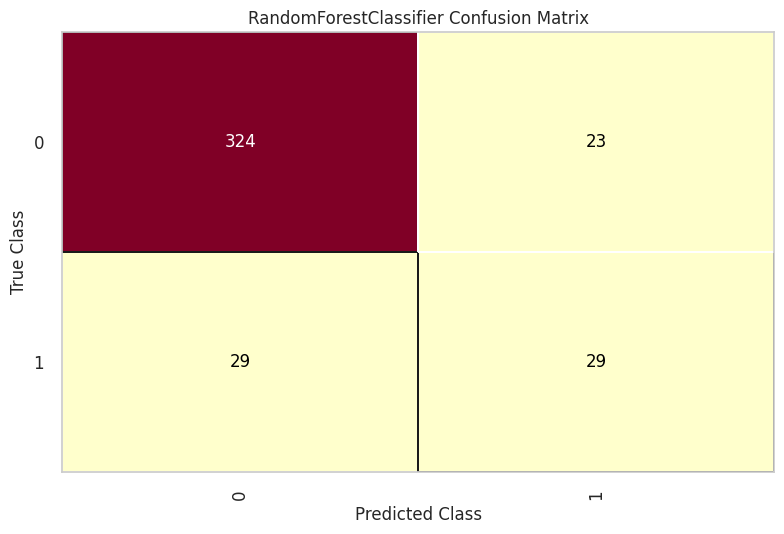

In [103]:
# Creating and fitting the Random Forest model with 100 estimators
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base.fit(x_train_b, y_train_b)

# Making predictions
y_pred_b = rf_base.predict(x_test_b)

# Evaluating the model
model_evaluation(y_pred_b,y_test_b,y_train_b,x_train_b,x_test_b,rf_base)


### V.4) Neural network - Baseline

Acuracy: 0.8741. (The overall percentage of correct predictions made by the model)
Precision: 0.5686(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.5000 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.5321 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


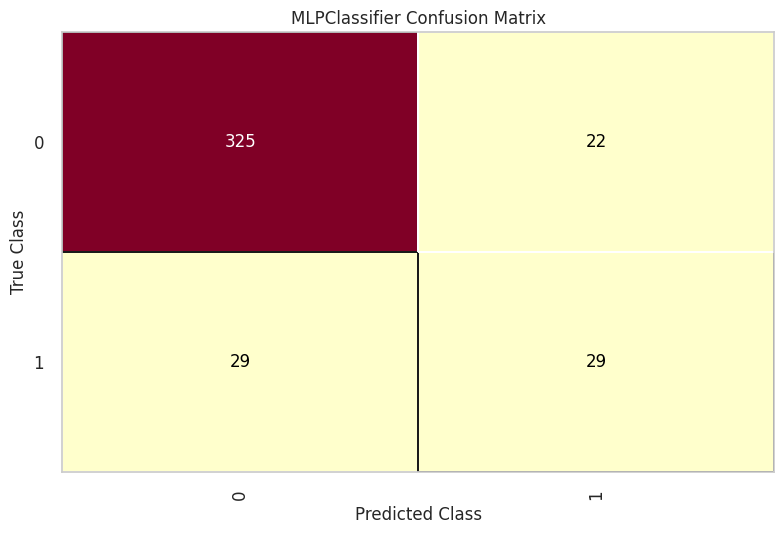

In [104]:
# Creating and fitting the MLP Classifier model with one hidden layer containing 100 neurons
model_nn_base = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Training the model
model_nn_base.fit(x_train_b, y_train_b)

# Making predictions
y_pred_b = model_nn_base.predict(x_test_b)


# Evaluating the model
model_evaluation(y_pred_b,y_test_b,y_train_b,x_train_b,x_test_b,model_nn_base)


### V.5) XGBoost - Baseline

Acuracy: 0.8790. (The overall percentage of correct predictions made by the model)
Precision: 0.5849(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.5345 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.5586 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


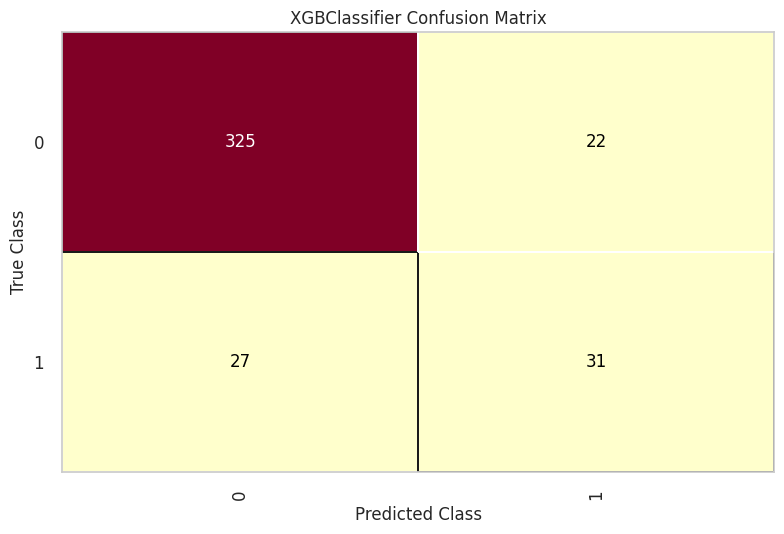

In [105]:
# Creating and fitting the XGBoost Classifier model
model_xgb_base = XGBClassifier(objective='binary:logistic', random_state=42)

# Training the model
model_xgb_base.fit(x_train_b, y_train_b)

# Making predictions
y_pred_b = model_xgb_base.predict(x_test_b)

# Evaluating the model
model_evaluation(y_pred_b,y_test_b,y_train_b,x_train_b,x_test_b,model_xgb_base)


# VI. Modeling
##### In this stage, various machine learning models are implemented and fine-tuned to achieve optimal predictive performance. The goal is to choose the model that best fits the dataset and problem requirements.

In [106]:
x = df.drop('Response',axis = 1)
y = df['Response']

x_train_unbalanced, x_test, y_train_unbalanced, y_test = train_test_split(x,y,test_size=0.20)
x_train_unbalanced.shape, x_test.shape, y_train_unbalanced.shape , y_test.shape


((1616, 42), (405, 42), (1616,), (405,))

In [107]:
#Creating synthetic data to balance the classes
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train_unbalanced, y_train_unbalanced)

### VI.1) Logistic Regression

Acuracy: 0.9235. (The overall percentage of correct predictions made by the model)
Precision: 0.7188(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.9452 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.8166 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


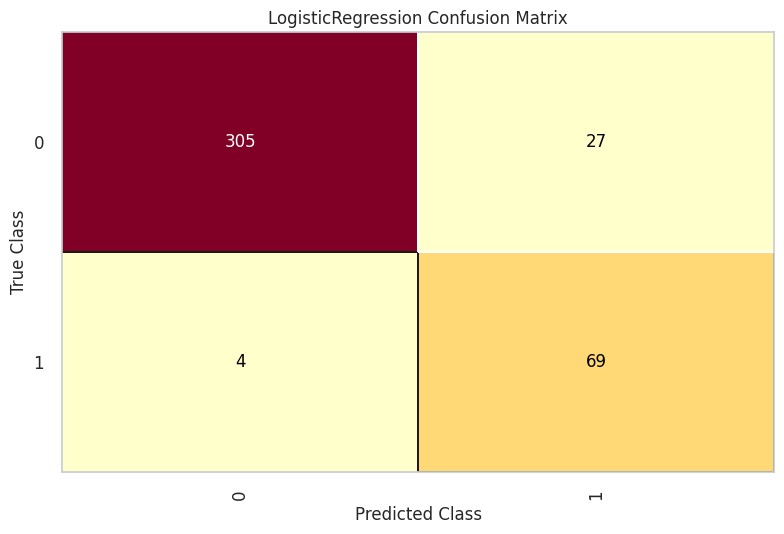

In [108]:
# Creating and fitting the Logistic Regression model
log = LogisticRegression()
log.fit(x_train, y_train)

# Making predictions
y_pred = log.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,log)


### VI.2) SVM

Acuracy: 0.9086. (The overall percentage of correct predictions made by the model)
Precision: 0.6837(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.9178 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7836 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


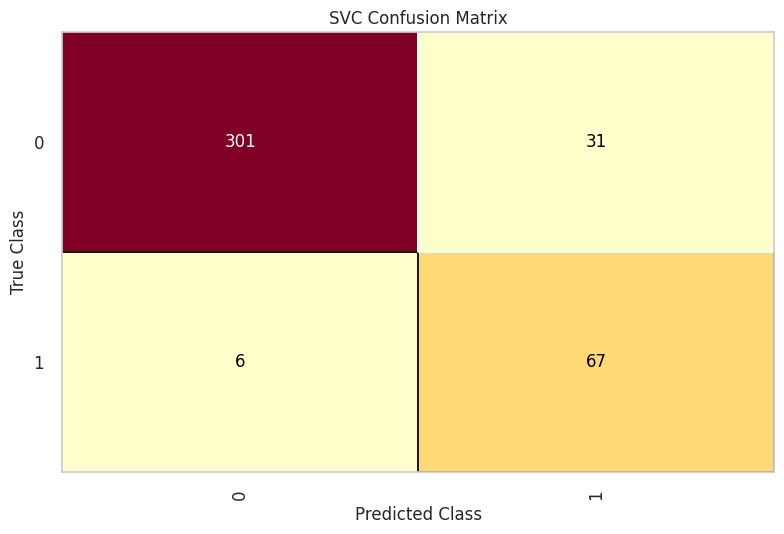

In [109]:
# Creating and fitting the Support Vector Machine (SVM) model with a linear kernel
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)

# Making predictions
y_pred = model_svm.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_svm)


### VI.3) Random forest

Acuracy: 0.9012. (The overall percentage of correct predictions made by the model)
Precision: 0.6854(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.8356 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7531 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


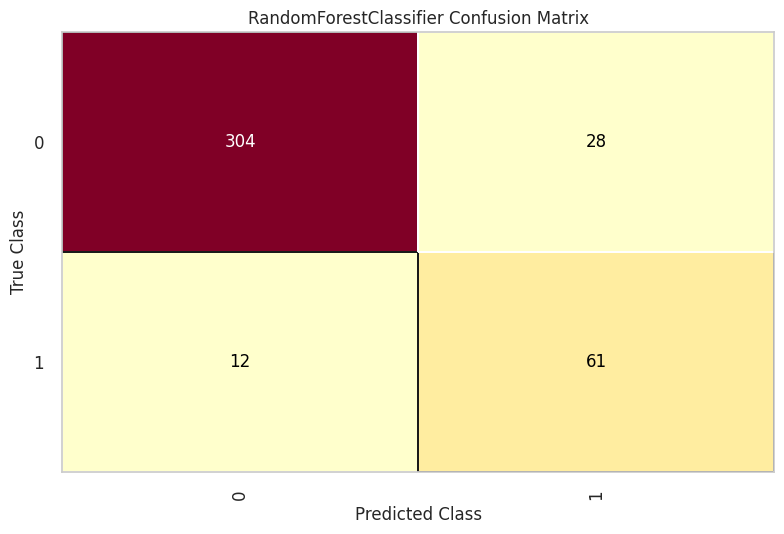

In [110]:
# Creating and fitting the Random Forest model with 100 estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Making predictions
y_pred = rf.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,rf)


### VI.4) Neural Network

Acuracy: 0.9210. (The overall percentage of correct predictions made by the model)
Precision: 0.7733(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.7945 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7838 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


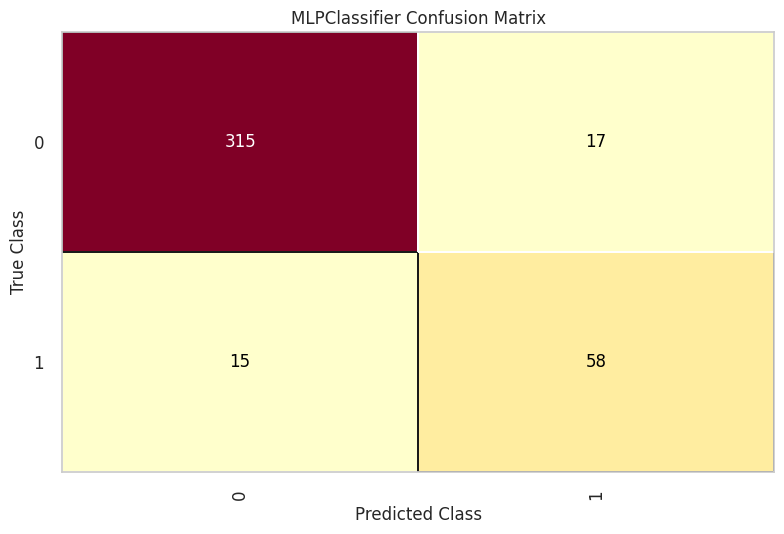

In [111]:
# Creating and fitting the MLP Classifier model with one hidden layer containing 100 neurons
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Training the model
model_nn.fit(x_train, y_train)

# Making predictions
y_pred = model_nn.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_nn)


### VI.5) XGBoost

Acuracy: 0.9086. (The overall percentage of correct predictions made by the model)
Precision: 0.7250(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.7945 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7582 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


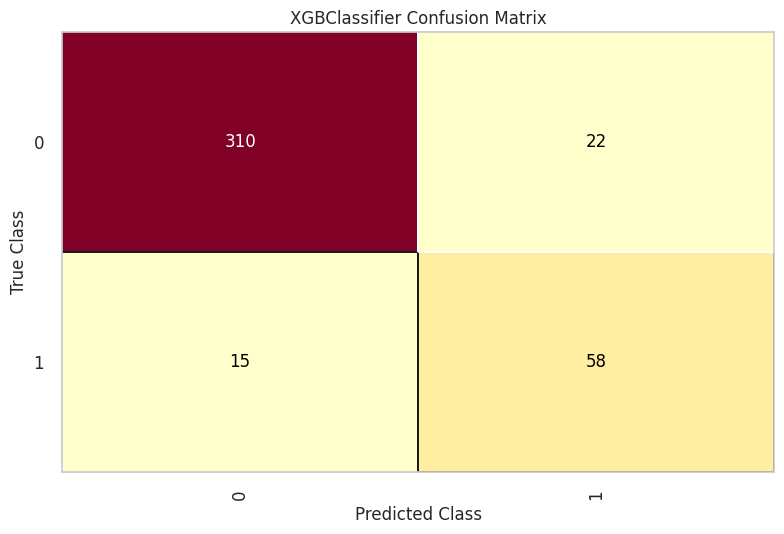

In [112]:
# Creating and fitting the XGBoost Classifier model
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Training the model
model_xgb.fit(x_train, y_train)

# Making predictions
y_pred = model_xgb.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_xgb)


### VI.6) Feature engeneering

A phase of this feature engineering will not only be focused on identifying features with less value for my predictive model but also on comprehending, in general, which features are more readily available when dealing with a real-world scenario.

Our features are: (where HH = hard to have and EH = expected to have)
1. 'Income' --> HH
2. 'Kidhome' --> HH
3. 'Teenhome' --> HH
4. 'Recency' --> EH
5. 'NumDealsPurchases' --> EH
6. 'NumWebPurchases' --> EH
7. 'NumCatalogPurchases'--> EH
8. 'NumStorePurchases' --> EH
9. 'NumWebVisitsMonth' --> EH
10. 'Complain' --> EH
11. 'Response' --> EH
12. 'Age' --> EH
13. 'Customer_Days' --> EH
14. 'MntTotal' --> EH
15. 'MntRegularProds' --> EH
16. 'buyer_status' --> EH
17. 'MntWines_percent' --> EH
18. 'MntFruits_percent' --> EH
19. 'MntMeatProducts_percent'--> EH
20. 'MntFishProducts_percent'--> EH
21. 'MntSweetProducts_percent'--> EH
22. 'MntGoldProds_percent'--> EH
23. 'buyer_class'--> EH
24. 'marital_level_Divorced'--> HH
25. 'marital_level_Married'--> HH
26. 'marital_level_Single'--> HH
27. 'marital_level_Together'--> HH
28. 'marital_level_Widow'--> HH
29. 'education_level_2n Cycle'--> HH
30. 'education_level_Basic'--> HH
31. 'education_level_Graduation'--> HH
32. 'education_level_Master'--> HH
33. 'education_level_PhD'--> HH
34. 'main_product_FishProducts'--> EH
35. 'main_product_Fruits'--> EH
36. 'main_product_GoldProds'--> EH
37. 'main_product_MeatProducts'--> EH
38. 'main_product_SweetProducts'--> EH
39. 'main_product_Wines'--> EH
40. 'main_channel_Catalog'--> EH
41. 'main_channel_Deals'--> EH
42. 'main_channel_Store'--> EH
43. 'main_channel_Web'--> EH

##### VI.6.1) Context engeneering

In [113]:
df_new = df.drop(['Income', 'Kidhome', 'Teenhome','marital_level_Divorced',
       'marital_level_Married', 'marital_level_Single',
       'marital_level_Together', 'marital_level_Widow',
       'education_level_2n Cycle', 'education_level_Basic',
       'education_level_Graduation', 'education_level_Master',
       'education_level_PhD'], axis=1)

df_new.columns


Index(['Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Days', 'MntTotal',
       'MntRegularProds', 'buyer_status', 'MntWines_percent',
       'MntFruits_percent', 'MntMeatProducts_percent',
       'MntFishProducts_percent', 'MntSweetProducts_percent',
       'MntGoldProds_percent', 'buyer_class', 'main_product_FishProducts',
       'main_product_Fruits', 'main_product_GoldProds',
       'main_product_MeatProducts', 'main_product_SweetProducts',
       'main_product_Wines', 'main_channel_Catalog', 'main_channel_Deals',
       'main_channel_Store', 'main_channel_Web'],
      dtype='object')

In [114]:
x = df_new.drop('Response',axis = 1)
y = df_new['Response']

x_train_unbalanced, x_test, y_train_unbalanced, y_test = train_test_split(x,y,test_size=0.20)
x_train_unbalanced.shape, x_test.shape, y_train_unbalanced.shape , y_test.shape


((1616, 29), (405, 29), (1616,), (405,))

In [115]:
#Creating synthetic data to balance the classes
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train_unbalanced, y_train_unbalanced)

Acuracy: 0.9259. (The overall percentage of correct predictions made by the model)
Precision: 0.7059(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.9231 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.8000 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


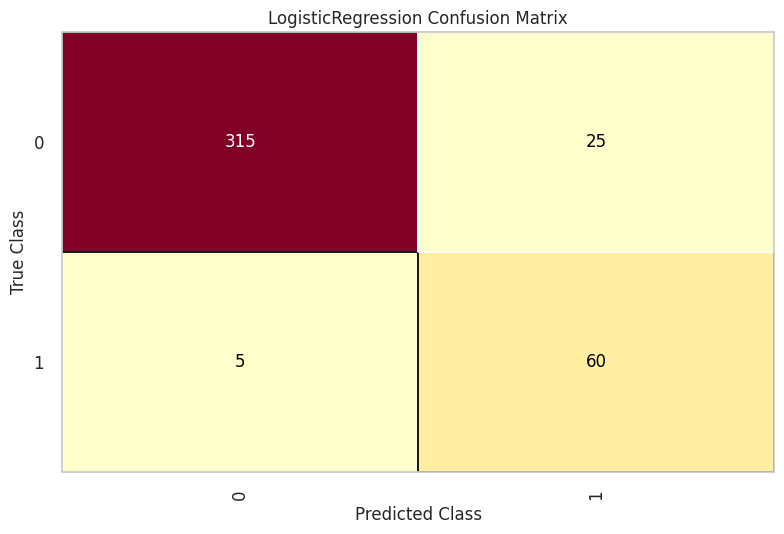

In [116]:
# Creating and fitting the Logistic Regression model
log = LogisticRegression()
log.fit(x_train, y_train)

# Making predictions
y_pred = log.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,log)


##### VI.6.2) Correlation Matrix

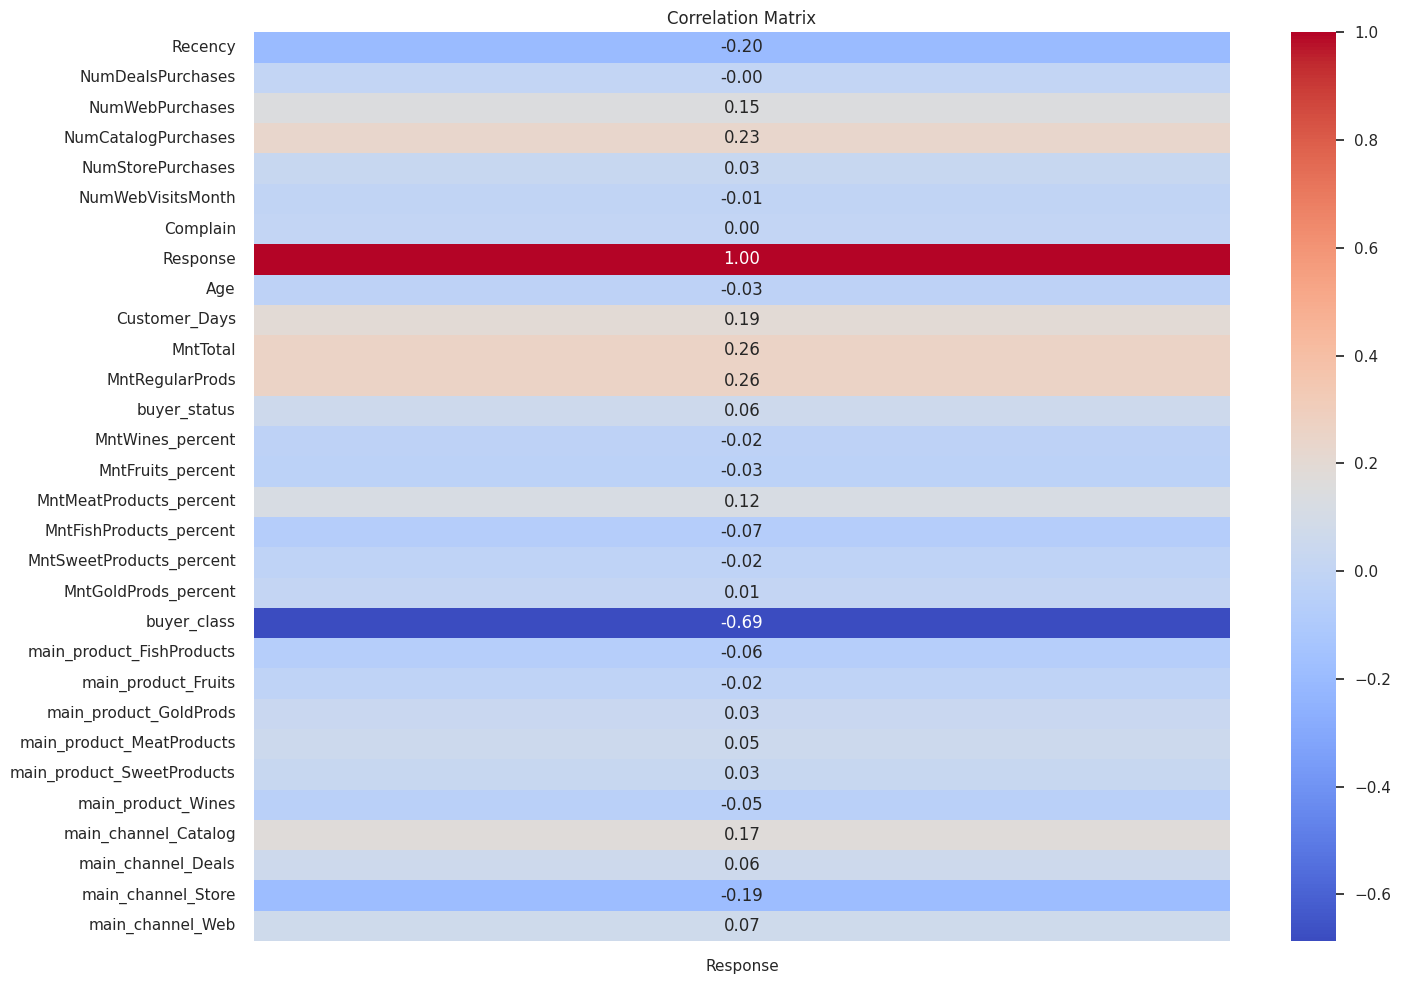

In [117]:
# Calculate the correlation coefficients between all columns and the 'Response' column
correlation = df_new.corr()['Response'].to_frame()

# Create a new figure for the heatmap with a specified size
plt.figure(figsize=(15, 10))

# Generate a heatmap using Seaborn, with annotations, a coolwarm color map, and two decimal places in the annotations
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Ensure a tight and well-organized layout
plt.tight_layout()

# Display the heatmap
plt.show()


##### VI.6.3) Random forest classifier

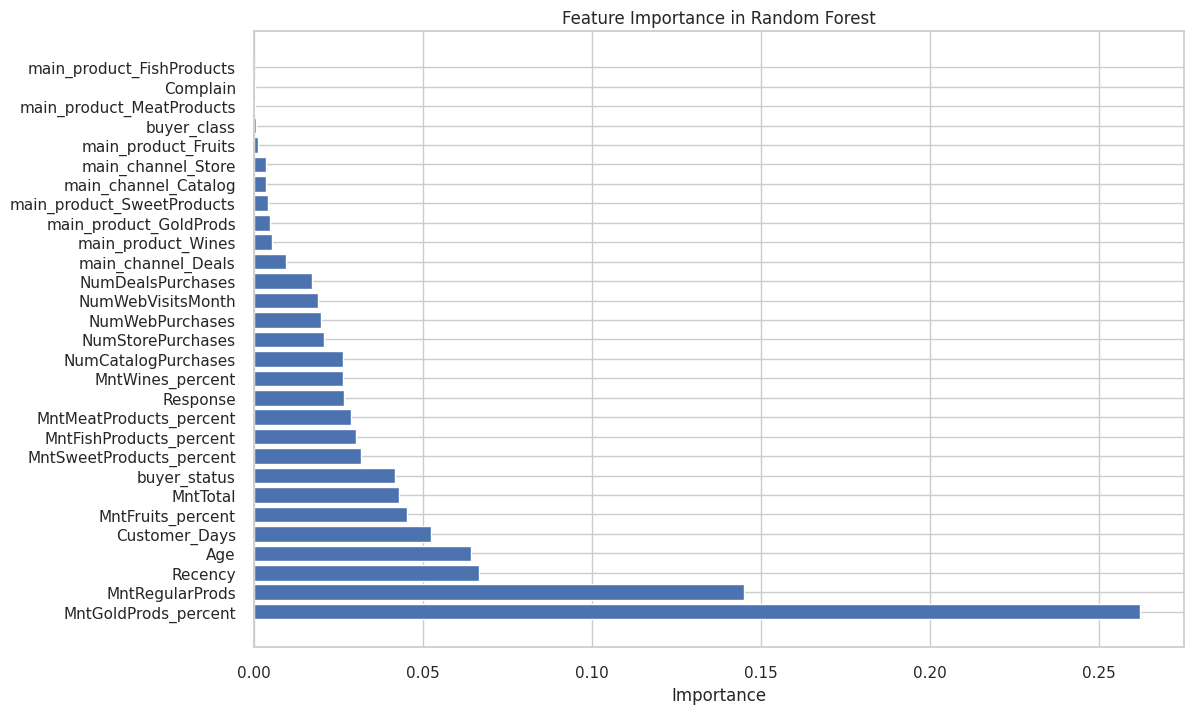

The most important feature is: MntGoldProds_percent


In [118]:
# Create a Random Forest Classifier model with a fixed random state for reproducibility
model_rf = RandomForestClassifier(random_state=42)

# Fit the model using the features (excluding 'Response') and the target variable ('Response')
model_rf.fit(df_new.drop('Response', axis=1), df_new['Response'])

# Retrieve feature importances from the trained model
feature_importances = model_rf.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
df_importances = pd.DataFrame({'Feature': df_new.columns[:-1], 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(df_importances['Feature'], df_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

# Print the most important feature based on the analysis
print("The most important feature is:", df_importances.iloc[0]['Feature'])


##### VI.6.4) Dimension reduction - PCA

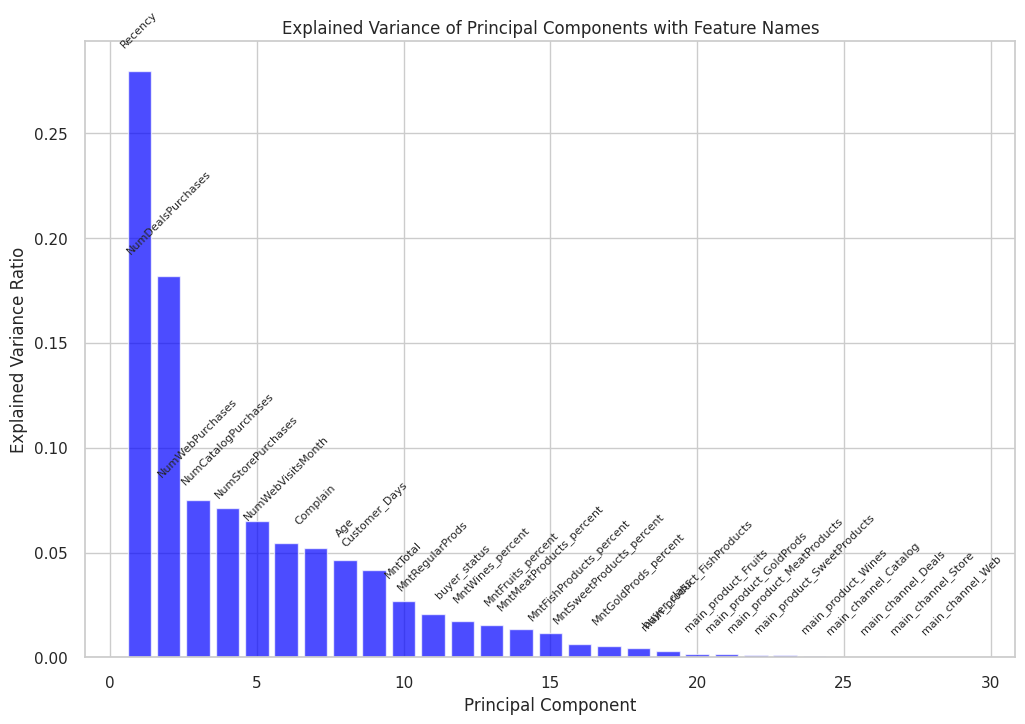

In [119]:
# Separate features (X) and target variable (y)
X = df_new.drop('Response', axis=1)
y = df_new['Response']

# Apply Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(X)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to store principal component, explained variance ratio, and corresponding feature names
df_var_exp = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                            'Explained Variance Ratio': explained_variance_ratio,
                            'Feature': X.columns})

# Create a bar plot to visualize the explained variance of each principal component with feature names
plt.figure(figsize=(12, 8))
bars = plt.bar(df_var_exp['Principal Component'], df_var_exp['Explained Variance Ratio'], color='blue', alpha=0.7)

# Add feature names as labels to the bars
for bar, feature in zip(bars, df_var_exp['Feature']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, feature, ha='center', va='bottom', rotation=45, fontsize=8)

# Set plot labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components with Feature Names')
plt.show()


##### VI.6.5) Engeneering result

In [120]:
df_new = df_new.drop(['Complain', 'main_product_FishProducts',
       'main_product_Fruits', 'main_product_GoldProds',
       'main_product_MeatProducts', 'main_product_SweetProducts',
       'main_product_Wines', 'main_channel_Deals',
       'main_channel_Web','main_channel_Catalog'], axis=1)


In [121]:
x = df_new.drop('Response',axis = 1)
y = df_new['Response']

x_train_unbalanced, x_test, y_train_unbalanced, y_test = train_test_split(x,y,test_size=0.20)
x_train_unbalanced.shape, x_test.shape, y_train_unbalanced.shape , y_test.shape


((1616, 19), (405, 19), (1616,), (405,))

In [122]:
#Creating synthetic data to balance the classes
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train_unbalanced, y_train_unbalanced)

Acuracy: 0.9062. (The overall percentage of correct predictions made by the model)
Precision: 0.6023(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.9464 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.7361 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


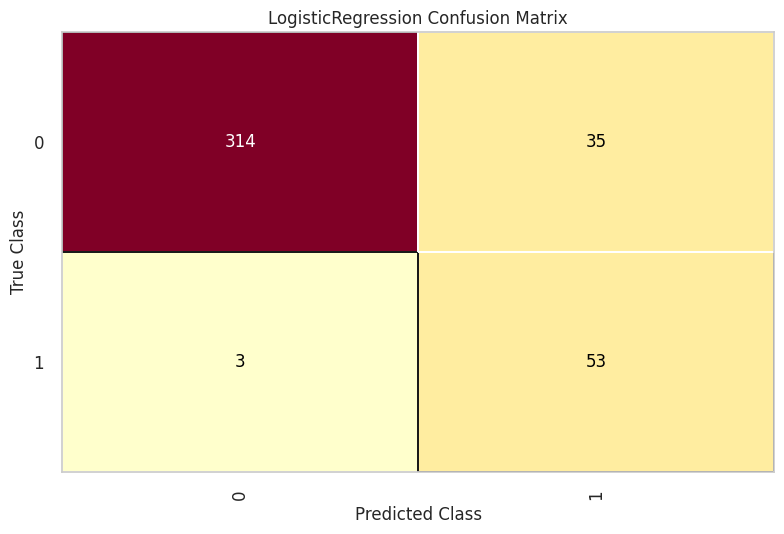

In [123]:
# Creating and fitting the Logistic Regression model
log = LogisticRegression()
log.fit(x_train, y_train)

# Making predictions
y_pred = log.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,log)


Despite losing more significantly in accuracy, since the model is predicting more times that the customer will buy, we still maintained good accuracy. Considering that this model aims to predict the effectiveness of a marketing strategy, I understand that the tradeoff of reducing precision versus reducing necessary information is positive.

Finally, after feature engineering, it is possible to interpret a profile of the buyer or non-coherent customer. Since this prediction is solely based on the purchase profile in percentage terms ('MntWines_percent', 'MntFruits_percent', 'MntMeatProducts_percent', 'MntFishProducts_percent', 'MntSweetProducts_percent', 'MntGoldProds_percent'), their buyer profile in the face of recent marketing campaigns ('buyer_status', 'buyer_class'), the gross volume of purchases ('MntTotal', 'MntRegularProds'), the volume of purchases in each channel ('NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'), customer historical information('Recency' - time since the last purchase; 'Customer_Days', 'main_channel_Store' - if the store is their main channel, 'NumWebVisitsMonth'), and age information.

### VI.7) Model tunning

In [124]:
# Create a Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values for the inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Types of regularization penalties ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']  # Solver algorithm for optimization, chosen for compatibility with 'l1' penalty
}


# Define evaluation metrics (accuracy and recall) using make_scorer
metrics = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score)}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(model_logreg, param_grid, cv=5, scoring=metrics, refit='accuracy', verbose=0)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_parameters = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = grid_search.predict(x_test)

# Calculate accuracy and recall of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_parameters)
print("Model Accuracy:", accuracy)
print("Model Recall:", recall)
print("Model precision:", precision)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Model Accuracy: 0.9037037037037037
Model Recall: 0.9464285714285714
Model precision: 0.5955056179775281


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


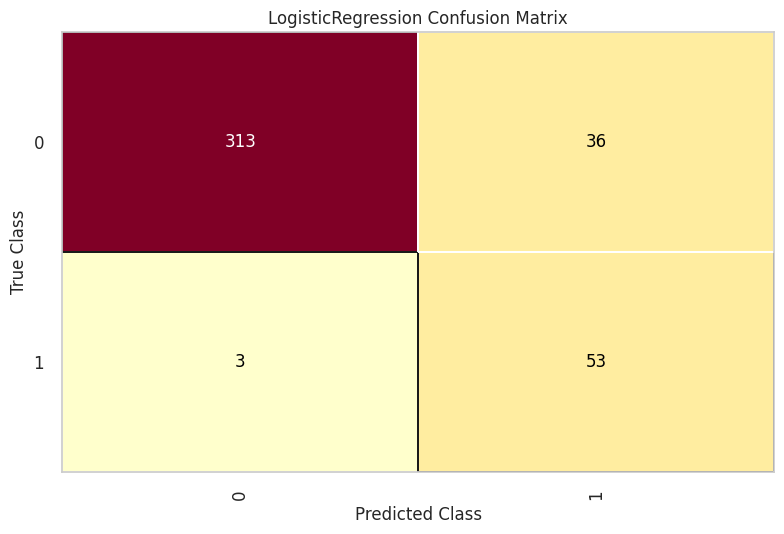

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [125]:
# Selecting the best estimator from the grid search
otm_model = grid_search.best_estimator_

# Generating the confusion matrix using the selected model on training and testing sets
cm_otm = confusion_matrix(otm_model, x_train, y_train, x_test, y_test)

# Displaying the confusion matrix
cm_otm.show()  # Corrected to call the show method


# VII. Pipeline creation
##### A data processing pipeline is constructed to automate and streamline the entire workflow, from data preprocessing to model deployment. Pipelines enhance reproducibility and facilitate collaboration.

In [126]:
# importing pipelines libraries
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector


In [127]:
# Define a column selector for columns with dtype float64
num_col = make_column_selector(dtype_include=['float64'])

# Define a column selector for columns excluding float64 (categorical columns)
cat_col = make_column_selector(dtype_exclude=['float64'])

# Create a column transformer with preprocessing steps
preproc = make_column_transformer(
    (RobustScaler(), num_col),    # Scale numerical columns using RobustScaler
    (OrdinalEncoder(), cat_col),  # Encode categorical columns using OrdinalEncoder
    remainder='passthrough'        # Pass through columns not specified in the num_col or cat_col
)

# Create a pipeline with the defined preprocessing and Logistic Regression as the estimator
pipe = make_pipeline(preproc, LogisticRegression())

In [128]:
#cross validation with the pipeline
cross_val_score(pipe,x_train,y_train,scoring='accuracy').mean()

0.9456266864543983

In [129]:
# Define the grid search with cross-validation
grid_search_pipe = GridSearchCV(
    pipe,  # The pipeline containing preprocessing and logistic regression
    param_grid={
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values for the inverse of regularization strength
        'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization penalties ('l1' for Lasso, 'l2' for Ridge)
        'logisticregression__solver': ['liblinear']  # Solver algorithm for optimization, chosen for compatibility with 'l1' penalty
    },
    cv=5,  # Number of cross-validation folds
    scoring='accuracy'  # Evaluation metric (accuracy in this case)
)

# Fit the grid search to the training data
grid_search_pipe.fit(x_train, y_train)

# Get the best estimator from the grid search
final_model = grid_search_pipe.best_estimator_
